In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json
#import matplotlib_venn
import networkx as nx
#import numexpr
import numpy as np
import numpy.linalg
import numpy.random
import pandas
import pickle
import pylab
import requests
#import sakmapper
import scipy
import scipy.cluster.hierarchy as sch
import scipy.interpolate
import scipy.optimize
import scipy.signal
import scipy.spatial.distance
import scipy.stats
from scipy.spatial.distance import pdist, squareform, euclidean
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, lil_matrix
from sklearn import cluster
import sklearn.cluster
import sklearn.metrics.pairwise
from math import sqrt

In [2]:
df_umap = pd.read_csv("data/elegance/umap.csv")
df_umap = df_umap[["V1", "V2"]]
df_umap

V1         V2
0       9.755217   0.674973
1       0.339255   6.595452
2      -8.856186  -0.307795
3       7.182153   3.941860
4      -0.664388  -9.457382
5      -0.064268   4.966076
6     -10.587546  -2.421852
7       1.670446  -8.533891
8      -0.508530   7.246268
9       8.159942   3.533181
10      0.164029   1.670509
11      8.792453   2.684149
12     -0.968385   5.967754
13     -0.680737  -0.137287
14      0.581253   6.286102
15     -2.504871  -0.240926
16     -0.649112   0.731937
17     -0.298354   1.966457
18     -2.176707   2.199812
19     -2.055218   2.795372
20    -12.423183   1.324132
21     -0.236115   1.532172
22     -8.696856  -0.122911
23     -0.159921   7.020608
24     -1.664980  -0.956352
25      8.743139   3.082577
26     -1.679400   1.597053
27     -8.150461  12.306501
28     -0.859370   1.055092
29     -8.366686   0.009210
...          ...        ...
89671   1.872378  -2.120458
89672   2.296323   0.499893
89673   2.085279  -1.204582
89674   2.446652  -2.149836
89675   2.462989   0.767275
89676   2.463106   0.771712
89677  -5.729556   4.354811
89678  -5.843404   4.160881
89679  -1.608159  -3.716300
89680   1.778628  -1.639051
89681  -4.568967   4.114930
89682  -4.953069   4.337000
89683  -7.948023 -10.879272
89684  -7.949743 -10.876939
89685   1.871456  -1.913726
89686  -5.074243   3.730065
89687   2.677986  -0.885930
89688  -5.569181   4.724780
89689 -15.864533  -2.968217
89690   1.326178  -1.729442
89691  -5.078886   4.422553
89692   1.306267  -1.707697
89693  -7.861332 -10.927811
89694   1.868114  -1.687805
89695  -9.790272  -2.208819
89696  -4.999546   3.691161
89697   2.433630   0.740647
89698  -7.915889 -10.905076
89699  -1.425461  -3.760656
89700   4.741096  -0.531921

[89701 rows x 2 columns]

In [3]:
pca_100 = pd.read_csv("data/elegance/pca_100.csv")
pca_100 = pca_100.drop("Unnamed: 0", axis=1)
pca_100

PC1        PC2        PC3        PC4        PC5       PC6  \
0       5.471498   5.983200  17.838099 -10.069552  -1.880418 -0.062337   
1     -16.692444  -4.509412   3.041569  -0.381880   1.189764 -2.113760   
2      -4.311143 -13.657309  -0.922749  -6.972618  -8.756832 -0.558663   
3     -13.956876  -3.845195   7.988474  -3.456401  -0.295622 -1.420254   
4      -6.252220   7.764693  -5.225396   6.392751  -5.091022 -3.075600   
5     -17.632946   0.991935  -3.113550   2.184917   4.490168 -6.428372   
6      11.394535 -23.926631  -8.360531 -13.608597 -20.503656  1.924362   
7      -6.647239  12.193445  -9.547738   8.604067  -4.001397 -3.844089   
8     -16.164591  -6.259074   4.687609  -0.253915  -2.850316 -1.446326   
9      -6.465433   1.000095  14.109822  -7.044026  -1.933589 -0.469065   
10    -17.712986  -2.324103  -1.049066   1.735617   3.805188 -2.910084   
11     -0.495028  -0.824263  11.761150  -5.464282  -3.266937 -1.884166   
12    -11.053328   0.099581  -2.356976   0.285245   1.230064 -6.637738   
13    -18.882823  -0.626650   0.586113   1.642480   3.608090 -3.187317   
14    -18.098102  -5.680902   3.130048   1.594135   1.149070 -0.909130   
15    -11.291352   3.651366  -4.100613   1.556574   3.633979 -4.552473   
16    -17.057226  -0.063741  -0.997706   1.451071   3.325743 -4.754181   
17    -17.110492  -2.579917  -0.508071   0.513354   4.658184 -0.659174   
18    -13.565694  -2.325970   0.261070   0.178681  -1.441166 -3.809815   
19    -18.670419  -3.832633  -1.308813   1.599703   0.767037 -3.025438   
20      5.885018 -12.928188 -11.779329 -10.054477  -1.740980 -0.933734   
21    -16.712055  -0.996116  -1.218142   1.192205   4.729038 -3.253551   
22     -6.302714 -13.138037   0.151300  -6.484582  -6.775943  0.502525   
23    -17.429824  -4.470940   3.933544  -0.468173  -0.048618 -3.105203   
24     -9.217670   3.589317  -4.019378   2.339241   0.455676 -4.998982   
25     -0.567824   1.866477  10.369351  -5.859036   0.447374 -0.911793   
26    -12.706072   0.262954  -0.771939   0.192092   3.418857 -5.351755   
27     20.182086 -33.382752  26.098286  31.916512 -10.057145 -0.630132   
28    -16.548124  -0.175126  -1.852840   0.949705   4.894825 -4.354873   
29     -7.946825  -5.447737  -1.754938  -3.081147  -1.901625 -2.778189   
...          ...        ...        ...        ...        ...       ...   
89671  -7.556323   0.011116  -0.743008   0.611753   4.967562 -1.267611   
89672   1.635844  -2.695774  -3.761003  -0.223765  -0.260916 -0.370945   
89673 -10.234110   0.719498  -2.787711   2.263964   2.199649 -3.276140   
89674  -7.266698  -2.147218   1.632006   0.839301   3.501336 -0.269087   
89675   6.579404   3.370199  -4.215888   2.396996   4.220244  0.078432   
89676   9.568217   4.408228  -6.301599   1.780410   7.289360 -3.072617   
89677  12.996850   0.714345  -8.811061   1.286742  14.863291  1.863990   
89678  10.392439  -2.325488  -9.504860  -0.677036  10.047745  1.417561   
89679  -0.348953   3.203375  -2.240159   0.877254   0.580732 -2.519414   
89680   1.237277   0.079960  -0.208185   0.193121   2.696698  0.237631   
89681   0.453943  -1.941561  -1.759427   3.552562   0.196988 -2.609841   
89682   1.739665   1.466910  -4.069002   5.737952   0.703158 -3.542950   
89683   3.009649  -2.040843  -4.943422  -0.984029   2.066064  0.315645   
89684  11.449640  -0.478239  -7.883973   1.935488   9.622282  2.829647   
89685  -5.691206  -1.357373  -0.525023   0.799998   3.059511  0.730558   
89686   9.633182  -8.995856 -14.472337  -5.998127  -0.355798  0.673010   
89687  -0.904253  -1.357914   0.650747  -1.472886   1.762731  3.630610   
89688   8.324692   2.654181  -6.352284   3.073309   5.669442 -2.391742   
89689   4.552619   0.498793  -7.036761   1.887341   9.658591  2.074434   
89690   1.578563  -0.472717  -5.135561  -2.326884   0.811620 -3.582224   
89691   7.579151  -2.026903  -4.859366   5.529581   1.881961 -3.546189   
89692   1.789647  -3.894883  -6.354365  -3.073187  -2.348710 -1.685791   
89693  13.860992 

In [4]:
def covering_patches(lens_data, resolution=15, gain=0.4, equalize=True):
    cols = lens_data.columns
    xmin, xmax = lens_data[cols[0]].min(), lens_data[cols[0]].max()
    ymin, ymax = lens_data[cols[1]].min(), lens_data[cols[1]].max()
    patch_dict = {}

    if equalize:
        perc_step = 100.0 / resolution
        fence_posts_x = [np.percentile(lens_data[cols[0]], post) for post in np.arange(perc_step, 100, perc_step)]
        fence_posts_y = [np.percentile(lens_data[cols[1]], post) for post in np.arange(perc_step, 100, perc_step)]

        lower_bound_x = np.array([xmin] + fence_posts_x)
        upper_bound_x = np.array(fence_posts_x + [xmax])
        lower_bound_y = np.array([ymin] + fence_posts_y)
        upper_bound_y = np.array(fence_posts_y + [ymax])

        widths_x = upper_bound_x - lower_bound_x
        spill_over_x = gain * widths_x
        lower_bound_x -= spill_over_x
        upper_bound_x += spill_over_x
        widths_y = upper_bound_y - lower_bound_y
        spill_over_y = gain * widths_y
        lower_bound_y -= spill_over_y
        upper_bound_y += spill_over_y

        for i in range(resolution):
            for j in range(resolution):
                patch = list(lens_data[(lens_data[cols[0]] > lower_bound_x[i]) &
                                       (lens_data[cols[0]] < upper_bound_x[i]) &
                                       (lens_data[cols[1]] > lower_bound_y[j]) &
                                       (lens_data[cols[1]] < upper_bound_y[j])].index)
                key = ((round(lower_bound_x[i], 2), round(upper_bound_x[i], 2)),
                       (round(lower_bound_y[j], 2), round(upper_bound_y[j], 2)))
                patch_dict[key] = patch
        return patch_dict

    else:
        width_x = (xmax - xmin) / resolution
        width_y = (ymax - ymin) / resolution
        spill_over_x = gain * width_x
        spill_over_y = gain * width_y

        lower_bound_x = np.arange(xmin, xmax, width_x) - spill_over_x
        upper_bound_x = np.arange(xmin, xmax, width_x) + width_x + spill_over_x
        lower_bound_y = np.arange(ymin, ymax, width_y) - spill_over_y
        upper_bound_y = np.arange(ymin, ymax, width_y) + width_y + spill_over_y
        for i in range(resolution):
            #print(i)
            for j in range(resolution):
                patch = list(lens_data[(lens_data[cols[0]] > lower_bound_x[i]) &
                                       (lens_data[cols[0]] < upper_bound_x[i]) &
                                       (lens_data[cols[1]] > lower_bound_y[j]) &
                                       (lens_data[cols[1]] < upper_bound_y[j])].index)
                key = ((round(lower_bound_x[i], 2), round(upper_bound_x[i], 2)),
                       (round(lower_bound_y[j], 2), round(upper_bound_y[j], 2)))
                patch_dict[key] = patch
        return patch_dict
    

In [5]:
def davies_bouldin(dist_mu, sigma):
    DB = 0
    K = len(sigma)
    for i in range(K):
        D_i = 0
        for j in range(K):
            if j == i:
                continue
            R_ij = (sigma[i] + sigma[j]) / dist_mu[i, j]
            if R_ij > D_i:
                D_i = R_ij
        DB += D_i
    return DB / K


def optimal_clustering(sparse_mtrx, patch, method='kmeans', statistic='db', max_K=5):
    if len(patch) == 1:
        return [patch]

    if statistic == 'db':
        if method == 'kmeans':
            if len(patch) <= 5:
                K_max = 2
            else:
                K_max = min(len(patch) // 2, max_K)
            clustering = {}
            db_index = []
            X = pd.DataFrame(sparse_mtrx.ix[patch, :])
            for k in range(2, K_max + 1):
                kmeans = cluster.KMeans(n_clusters=k).fit(X)
                clustering[k] = pd.DataFrame(kmeans.predict(X), index=patch)
                dist_mu = squareform(pdist(kmeans.cluster_centers_))
                sigma = []
                for i in range(k):
                    points_in_cluster = clustering[k][clustering[k][0] == i].index
                    #print(points_in_cluster)
                    sigma.append(sqrt(X.ix[points_in_cluster, :].var(axis=0).sum()))
                db_index.append(davies_bouldin(dist_mu, np.array(sigma)))
            db_index = np.array(db_index)
            k_optimal = np.argmin(db_index) + 2
            return [list(clustering[k_optimal][clustering[k_optimal][0] == i].index) for i in range(k_optimal)]


In [211]:
from sklearn import cluster
patch_clusterings = {}
counter = 0
patches = covering_patches(df_umap_0)
for key, patch in patches.items():
    if len(patch) > 0:
        patch_clusterings[key] = optimal_clustering(pca_100_0, patch)
        counter += 1
        print(counter)
print("total of {} patches required clustering".format(counter))

all_clusters = []
for key in patch_clusterings:
    all_clusters += patch_clusterings[key]
#print(len(all_clusters))
#print(all_clusters)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
total of 183 patches required clustering


In [212]:
import networkx as nx
all_clusters = []
for key in patch_clusterings:
    all_clusters += patch_clusterings[key]
num_nodes = len(all_clusters)
print("this implies {} nodes in the mapper graph".format(num_nodes))

A = np.zeros((num_nodes, num_nodes))
for i in range(num_nodes):
    #print(i)
    for j in range(i):
        overlap = set(all_clusters[i]).intersection(set(all_clusters[j]))
        if len(overlap) > 0:
            A[i, j] = 1
            A[j, i] = 1

G = nx.from_numpy_matrix(A)
total = []
all_clusters_new = []
mapping = {}
cont = 0
for m in all_clusters:
    total += m
for n, m in enumerate(all_clusters):
    #print(n)
    if len(m) == 1 and total.count(m) > 1:
        G.remove_node(n)
    else:
        all_clusters_new.append(m)
        mapping[n] = cont
        cont += 1
H = nx.relabel_nodes(G, mapping)
#return H, all_clusters_new, patches

this implies 563 nodes in the mapper graph


In [8]:
cells = pd.read_csv("data/elegance/GSE126954_cell_annotation.csv")
cells

Unnamed: 0                      cell  n.umi   time.point  \
0      AAACCTGAGACAATAC-300.1.1  AAACCTGAGACAATAC-300.1.1   1630  300_minutes   
1      AAACCTGAGGGCTCTC-300.1.1  AAACCTGAGGGCTCTC-300.1.1   2319  300_minutes   
2      AAACCTGAGTGCGTGA-300.1.1  AAACCTGAGTGCGTGA-300.1.1   3719  300_minutes   
3      AAACCTGAGTTGAGTA-300.1.1  AAACCTGAGTTGAGTA-300.1.1   4251  300_minutes   
4      AAACCTGCAAGACGTG-300.1.1  AAACCTGCAAGACGTG-300.1.1   1003  300_minutes   
5      AAACCTGCAAGGTTCT-300.1.1  AAACCTGCAAGGTTCT-300.1.1   1319  300_minutes   
6      AAACCTGCACGTTGGC-300.1.1  AAACCTGCACGTTGGC-300.1.1   7503  300_minutes   
7      AAACCTGCATCACCCT-300.1.1  AAACCTGCATCACCCT-300.1.1   1400  300_minutes   
8      AAACCTGGTACATGTC-300.1.1  AAACCTGGTACATGTC-300.1.1   4100  300_minutes   
9      AAACCTGGTCTGGAGA-300.1.1  AAACCTGGTCTGGAGA-300.1.1   2648  300_minutes   
10     AAACCTGGTGTGAATA-300.1.1  AAACCTGGTGTGAATA-300.1.1   1458  300_minutes   
11     AAACCTGGTTATGCGT-300.1.1  AAACCTGGTTATGCGT-300.1.1   1463  300_minutes   
12     AAACCTGGTTTACTCT-300.1.1  AAACCTGGTTTACTCT-300.1.1   1291  300_minutes   
13     AAACCTGTCACCCTCA-300.1.1  AAACCTGTCACCCTCA-300.1.1   1926  300_minutes   
14     AAACCTGTCATCTGCC-300.1.1  AAACCTGTCATCTGCC-300.1.1   1669  300_minutes   
15     AAACCTGTCCAGATCA-300.1.1  AAACCTGTCCAGATCA-300.1.1   1333  300_minutes   
16     AAACCTGTCGGCCGAT-300.1.1  AAACCTGTCGGCCGAT-300.1.1   1633  300_minutes   
17     AAACGGGAGAGGTTAT-300.1.1  AAACGGGAGAGGTTAT-300.1.1   1894  300_minutes   
18     AAACGGGAGAGGTTGC-300.1.1  AAACGGGAGAGGTTGC-300.1.1   3072  300_minutes   
19     AAACGGGAGCGTTGCC-300.1.1  AAACGGGAGCGTTGCC-300.1.1   3613  300_minutes   
20     AAACGGGCACATGACT-300.1.1  AAACGGGCACATGACT-300.1.1   4365  300_minutes   
21     AAACGGGCAGGTTTCA-300.1.1  AAACGGGCAGGTTTCA-300.1.1   1692  300_minutes   
22     AAACGGGCAGTCGTGC-300.1.1  AAACGGGCAGTCGTGC-300.1.1   5866  300_minutes   
23     AAACGGGGTTGTGGCC-300.1.1  AAACGGGGTTGTGGCC-300.1.1   3268  300_minutes   
24     AAACGGGTCGGATGGA-300.1.1  AAACGGGTCGGATGGA-300.1.1   1139  300_minutes   
25     AAACGGGTCGTTACGA-300.1.1  AAACGGGTCGTTACGA-300.1.1   1362  300_minutes   
26     AAACGGGTCTATCCCG-300.1.1  AAACGGGTCTATCCCG-300.1.1   1112  300_minutes   
27     AAAGATGAGAGTCGGT-300.1.1  AAAGATGAGAGTCGGT-300.1.1   7800  300_minutes   
28     AAAGATGCAAGGGTCA-300.1.1  AAAGATGCAAGGGTCA-300.1.1   1468  300_minutes   
29     AAAGATGCAGACAGGT-300.1.1  AAAGATGCAGACAGGT-300.1.1   1469  300_minutes   
...                         ...                       ...    ...          ...   
89671      CGCGTTTAGCGTAGTG-b02      CGCGTTTAGCGTAGTG-b02    818        mixed   
89672      CGTAGCGAGGAGTAGA-b02      CGTAGCGAGGAGTAGA-b02    530        mixed   
89673      CGTTCTGGTGGTTTCA-b02      CGTTCTGGTGGTTTCA-b02   1491        mixed   
89674      CTTACCGAGGCCCGTT-b02      CTTACCGAGGCCCGTT-b02    907        mixed   
89675      CTTCTCTCATGACGGA-b02      CTTCTCTCATGACGGA-b02    624        mixed   
89676      CTTGGCTTCTGACCTC-b02      CTTGGCTTCTGACCTC-b02    557        mixed   
89677      GAACCTAAGCTCCTCT-b02      GAACCTAAGCTCCTCT-b02    670        mixed   
89678      GAACCTAGTGACTACT-b02      GAACCTAGTGACTACT-b02    933        mixed   
89679      GAATAAGAGCTAACTC-b02      GAATAAGAGCTAACTC-b02    515        mixed   
89680      GACGGCTTCACAATGC-b02      GACGGCTTCACAATGC-b02    583        mixed   
89681      GACTGCGCACTTAAGC-b02      GACTGCGCACTTAAGC-b02    761        mixed   
89682      GCAAACTCACCTATCC-b02      GCAAACTCACCTATCC-b02    642        mixed   
89683      GCACATAAGCGCTCCA-b02      GCACATAAGCGCTCCA-b02    644        mixed   
89684      GCTGCTTCATAGAAAC-b02      GCTGCTTCATAGAAAC-b02    566        mixed   
89685      GGCCGATCACAGAGGT-b02      GGCCGATCACAGAGGT-b02    572        mixed   
89686      GGGCACTTCTGCAAGT-b02      GGGCACTTCTGCAAGT-b02   1271        mixed   
89687      GTAACGTGTCACAAGG-b02      GTAACGTGTCACAAGG-b02    518        mixed   
89688      GTAACTGCACATGACT-b02      GTAACTGCACATGAC

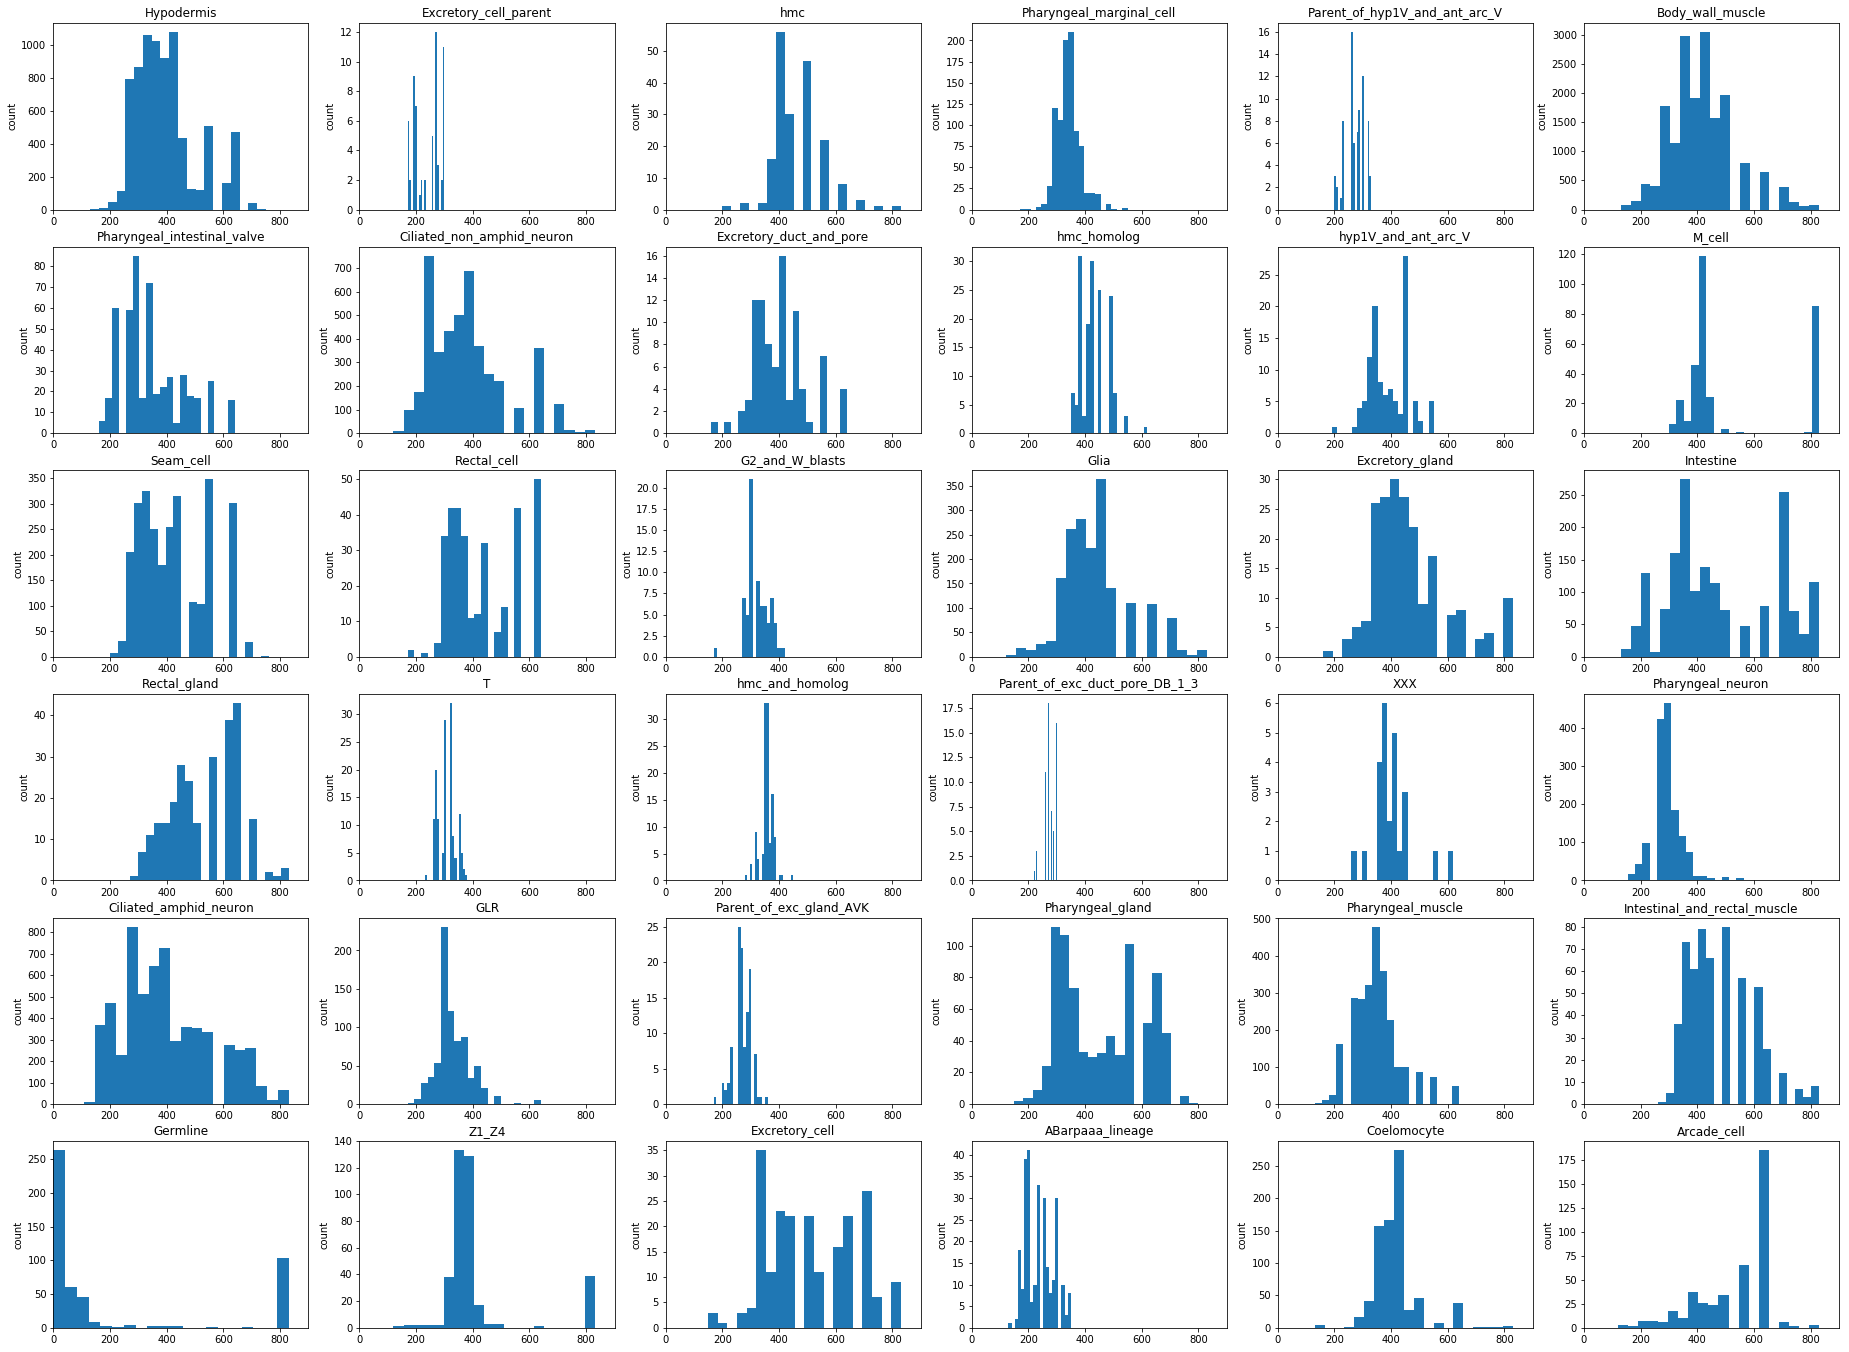

In [205]:
# celltype毎の時間分布
a = cells.ix[:, ["cell.type", "raw.embryo.time"]].dropna()
fig = plt.figure(figsize=(32, 24))
for i, celltype in enumerate(celltypes):
    time_dist = a[a["cell.type"]==celltype]["raw.embryo.time"]
    ax1 = fig.add_subplot(6,6, i+1)
    ax1.hist(time_dist, bins=20)
    ax1.set_xlim(0, 900)
    ax1.set_title("{}".format(celltype))
    #ax1.set_xlabel("raw embryo time")
    ax1.set_ylabel("count")
#plt.savefig("raw_embryo_time_dist_of_each_celltype.png")

ValueError: num must be 1 <= num <= 36, not 37

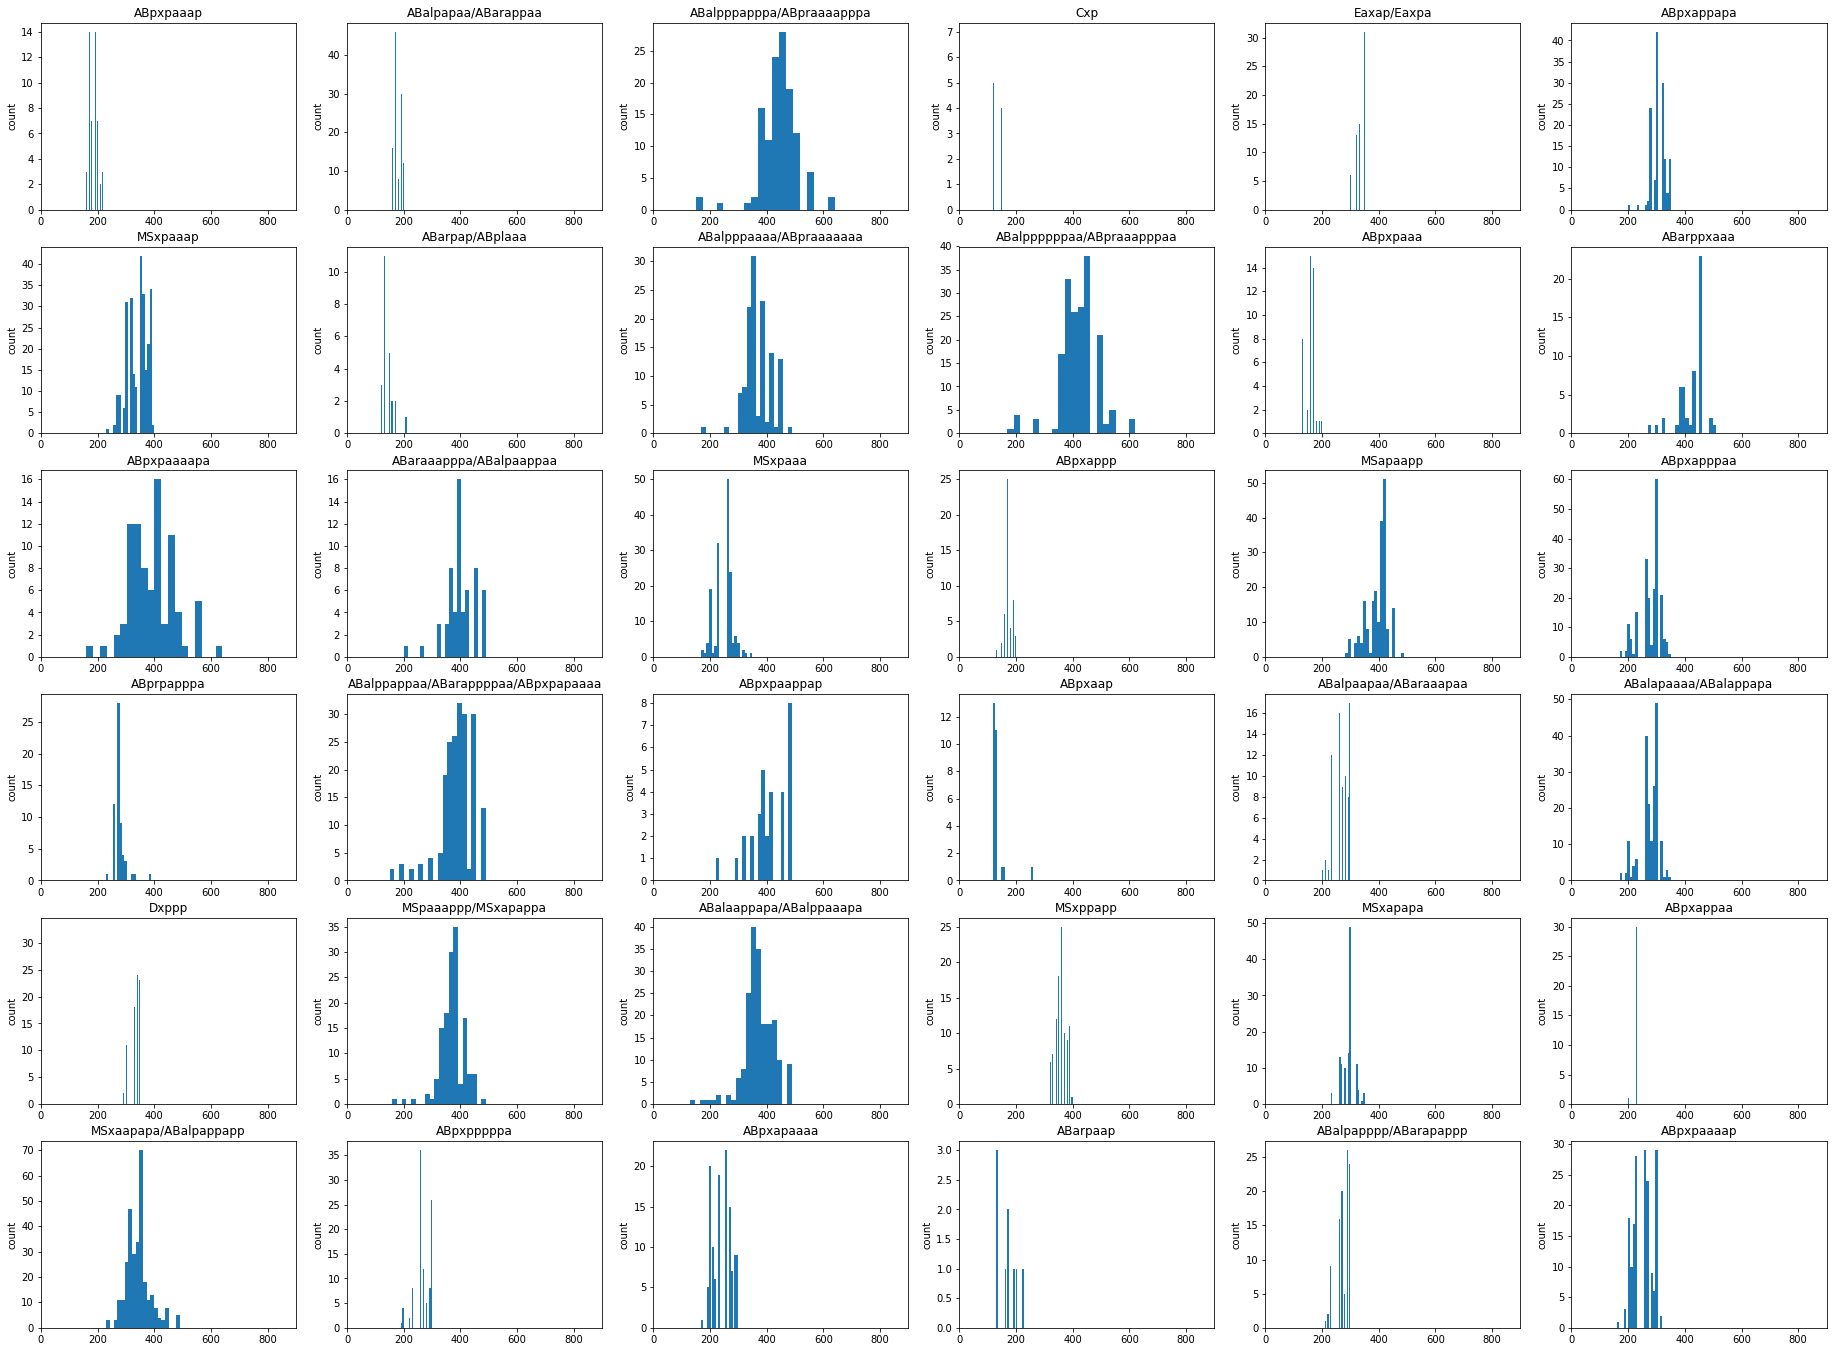

In [170]:
# lineage毎の時間分布
# a = cells.ix[:, ["lineage", "raw.embryo.time"]].dropna()
# lineages = list(set(a["lineage"]))
# fig = plt.figure(figsize=(32, 24))
# for i, lineage in enumerate(lineages):
#     time_dist = a[a["lineage"]==lineage]["raw.embryo.time"]
#     ax1 = fig.add_subplot(6,6, i+1)
#     ax1.hist(time_dist, bins=20)
#     ax1.set_xlim(0, 900)
#     ax1.set_title("{}".format(lineage))
#     #ax1.set_xlabel("raw embryo time")
#     ax1.set_ylabel("count")
#plt.savefig("raw_embryo_time_dist_of_each_lineage")

In [9]:
celltypes = list(set(cells["cell.type"].dropna()))
celltypes

['Seam_cell',
 'hmc',
 'Arcade_cell',
 'Rectal_gland',
 'T',
 'Hypodermis',
 'Z1_Z4',
 'G2_and_W_blasts',
 'Pharyngeal_marginal_cell',
 'hyp1V_and_ant_arc_V',
 'Body_wall_muscle',
 'Parent_of_hyp1V_and_ant_arc_V',
 'Intestinal_and_rectal_muscle',
 'hmc_and_homolog',
 'Pharyngeal_neuron',
 'Excretory_gland',
 'Rectal_cell',
 'GLR',
 'Excretory_duct_and_pore',
 'Coelomocyte',
 'Glia',
 'Excretory_cell',
 'Pharyngeal_intestinal_valve',
 'ABarpaaa_lineage',
 'Parent_of_exc_duct_pore_DB_1_3',
 'Parent_of_exc_gland_AVK',
 'Excretory_cell_parent',
 'Intestine',
 'hmc_homolog',
 'M_cell',
 'Germline',
 'Ciliated_non_amphid_neuron',
 'XXX',
 'Ciliated_amphid_neuron',
 'Pharyngeal_gland',
 'Pharyngeal_muscle']

In [10]:
import matplotlib.cm as cm

def color_mapping(time):
    if time < 150:
        return "navy"
    elif time < 210:
        return "royalblue"
    elif time < 270:
        return "skyblue"
    elif time < 330:
        return "seagreen"
    elif time < 390:
        return "limegreen"
    elif time < 450:
        return "y"
    elif time < 510:
        return "gold"
    elif time < 580:
        return "orange"
    else:
        return "red"
    
    

In [23]:
# sizeは含まれている細胞数
# colorは、embryo timeの平均
import math
size = {}
times = {}
colors_embryotime = {}
stddiv_dist = []
for idx, cluster in enumerate(all_clusters_new):
    size[idx] = len(cluster) 
    time_dist = cells.ix[cluster, "raw.embryo.time"]
    #print(time_dist)
    #plt.hist(time_dist)
    stddiv_dist.append(math.sqrt(np.var(time_dist)))
    ave_time = time_dist.sum() / len(cluster)
    times[idx] = ave_time
    colors_embryotime[idx] = color_mapping(ave_time)

sizes = size.values()
#sizes
sizes_norm = list(np.array(list(sizes))*3)
sizes_norm

[303,
 105,
 288,
 1449,
 471,
 666,
 156,
 183,
 9,
 18,
 6,
 18,
 93,
 195,
 1047,
 294,
 744,
 705,
 144,
 282,
 258,
 156,
 384,
 114,
 141,
 90,
 105,
 96,
 138,
 51,
 27,
 66,
 108,
 6,
 18,
 12,
 36,
 435,
 159,
 147,
 30,
 540,
 429,
 108,
 42,
 111,
 60,
 162,
 312,
 96,
 114,
 111,
 141,
 87,
 549,
 543,
 840,
 504,
 510,
 153,
 165,
 195,
 192,
 45,
 117,
 87,
 66,
 54,
 99,
 39,
 99,
 54,
 90,
 33,
 24,
 12,
 84,
 498,
 498,
 84,
 21,
 105,
 156,
 111,
 171,
 495,
 489,
 213,
 156,
 312,
 189,
 120,
 54,
 108,
 237,
 315,
 300,
 132,
 243,
 144,
 30,
 21,
 63,
 21,
 18,
 15,
 12,
 18,
 27,
 9,
 228,
 174,
 228,
 174,
 9,
 6,
 30,
 48,
 33,
 9,
 30,
 108,
 138,
 21,
 171,
 156,
 72,
 39,
 111,
 39,
 48,
 36,
 60,
 138,
 171,
 42,
 117,
 21,
 102,
 144,
 243,
 210,
 141,
 537,
 252,
 72,
 174,
 105,
 66,
 108,
 237,
 57,
 72,
 33,
 78,
 39,
 51,
 72,
 27,
 18,
 66,
 69,
 126,
 81,
 117,
 102,
 39,
 18,
 18,
 87,
 15,
 45,
 162,
 96,
 66,
 135,
 249,
 354,
 318,
 372,
 186,
 1

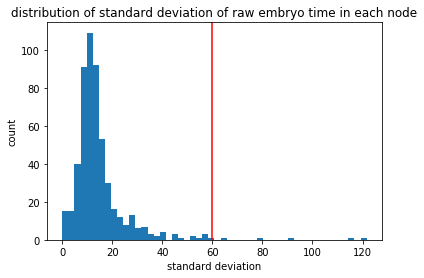

In [12]:
# 各ノードのおけるembryo_timeの分散
plt.hist(stddiv_dist, bins=50)
plt.title("distribution of standard deviation of raw embryo time in each node")
plt.xlabel("standard deviation")
plt.ylabel("count")
plt.axvline(x=60, c='r')

In [13]:
# celltypeで色つけ
# colorは、そのnodeに含まれているcell.typeが一番多いもので色つけ
import matplotlib.cm as cm

celltype_colors = cm.rainbow(np.linspace(0, 1, len(celltypes)))
celltype_colors

celltype_freq_dist = []

colors_celltype_rep = {}
for idx, cluster in enumerate(all_clusters_new):
    
    data = cells.ix[cluster, "cell.type"].dropna()
    if len(data) == 0:
        print("hoge")
        print(data)
        continue
    elif len(data.mode()) == 0: # (len(data) == 2 or len(data) == 1) and 
        print("==========")
        print(data)
        rep = list(data)[0]
    else:
        print(data)
        print(data.mode())
        rep = data.mode()[0]
    
    rep_idx = celltypes.index(rep)
    freq = data.value_counts()[rep] / len(data)
    rgbd = celltype_colors[rep_idx]
    celltype_freq_dist.append(freq)
    rgbd[3] = freq
    colors_celltype_rep[idx] = celltype_colors[rep_idx]

40667    Hypodermis
43837    Hypodermis
44613    Hypodermis
45227    Hypodermis
49501    Hypodermis
50171    Hypodermis
50218    Hypodermis
50339    Hypodermis
50397    Hypodermis
50467    Hypodermis
50777    Hypodermis
50874    Hypodermis
50887    Hypodermis
50971    Hypodermis
51059    Hypodermis
51115    Hypodermis
51371    Hypodermis
51412    Hypodermis
51432    Hypodermis
51562    Hypodermis
51696    Hypodermis
51743    Hypodermis
51767    Hypodermis
52088    Hypodermis
52231    Hypodermis
52318    Hypodermis
52323    Hypodermis
52359    Hypodermis
52456    Hypodermis
52845    Hypodermis
            ...    
58384    Hypodermis
58645    Hypodermis
58712    Hypodermis
58872    Hypodermis
58914    Hypodermis
58981    Hypodermis
59003    Hypodermis
59096    Hypodermis
59162    Hypodermis
59228    Hypodermis
59285    Hypodermis
59331    Hypodermis
59370    Hypodermis
59483    Hypodermis
59632    Hypodermis
59688    Hypodermis
59795    Hypodermis
68668    Hypodermis
68701    Hypodermis


3127     Hypodermis
13126    Hypodermis
13515    Hypodermis
19104    Hypodermis
22377    Hypodermis
25313    Hypodermis
30134    Hypodermis
32975    Hypodermis
37146    Hypodermis
37276    Hypodermis
37949    Hypodermis
40524    Hypodermis
41295    Hypodermis
41371    Hypodermis
41497    Hypodermis
41956    Hypodermis
42094    Hypodermis
42828    Hypodermis
43094    Hypodermis
43410    Hypodermis
43815    Hypodermis
44056    Hypodermis
44108    Hypodermis
44116    Hypodermis
45199    Hypodermis
45840    Hypodermis
46174    Hypodermis
46450    Hypodermis
46737    Hypodermis
46815    Hypodermis
            ...    
58850    Hypodermis
58980    Hypodermis
59086    Hypodermis
59103    Hypodermis
59253    Hypodermis
59279    Hypodermis
59387    Hypodermis
59443    Hypodermis
59513    Hypodermis
59557    Hypodermis
59626    Hypodermis
59654    Hypodermis
59658    Hypodermis
59665    Hypodermis
59709    Hypodermis
59741    Hypodermis
59799    Hypodermis
59812    Hypodermis
59831    Hypodermis


5909     Hypodermis
13515    Hypodermis
27147    Hypodermis
37949    Hypodermis
40524    Hypodermis
43410    Hypodermis
46386    Hypodermis
52215    Hypodermis
52369    Hypodermis
53428    Hypodermis
53731    Hypodermis
53878    Hypodermis
54875    Hypodermis
55316    Hypodermis
55852    Hypodermis
55904    Hypodermis
56195    Hypodermis
56530    Hypodermis
56668    Hypodermis
56777    Hypodermis
56919    Hypodermis
56943    Hypodermis
56973    Hypodermis
58255    Hypodermis
58312    Hypodermis
58571    Hypodermis
58980    Hypodermis
59103    Hypodermis
59229    Hypodermis
62799    Hypodermis
69940    Hypodermis
72876    Hypodermis
74438    Hypodermis
74861    Hypodermis
76399    Hypodermis
76449    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
50434    Hypodermis
51256    Hypodermis
51946    Hypodermis
52830    Hypodermis
54136    Hypodermis
54373    Hypodermis
54926    Hypodermis
55244    Hypodermis
56974    Hypodermis
57137    Hypodermis
58732    Hypodermis

3173     Hypodermis
3972     Hypodermis
4806     Hypodermis
7740     Hypodermis
10290    Hypodermis
16631    Hypodermis
16876    Hypodermis
17627    Hypodermis
18319    Hypodermis
24095    Hypodermis
26153    Hypodermis
26903    Hypodermis
31177    Hypodermis
34581    Hypodermis
34657    Hypodermis
35741    Hypodermis
36393    Hypodermis
36566    Hypodermis
36982    Hypodermis
37041    Hypodermis
37973    Hypodermis
41092    Hypodermis
43970    Hypodermis
46329    Hypodermis
47289    Hypodermis
49572    Hypodermis
49886    Hypodermis
50189    Hypodermis
50641    Hypodermis
52990    Hypodermis
54852    Hypodermis
55658    Hypodermis
58092    Hypodermis
58804    Hypodermis
58998    Hypodermis
59786    Hypodermis
67132    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
32364    Hypodermis
40422    Hypodermis
42122    Hypodermis
46241    Hypodermis
46826    Hypodermis
50195    Hypodermis
50449    Hypodermis
50564    Hypodermis
50568    Hypodermis
51091    Hypodermis

51530    Hypodermis
51984    Hypodermis
55001    Hypodermis
55194    Hypodermis
59351    Hypodermis
59712    Hypodermis
73247    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
10242    Hypodermis
24960    Hypodermis
35388    Hypodermis
45015    Hypodermis
46518    Hypodermis
47713    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
5925     Hypodermis
28411    Hypodermis
28572    Hypodermis
41583    Hypodermis
47960    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
17891    Hypodermis
36296    Hypodermis
76549    Hypodermis
76711    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
6474     Hypodermis
16780    Hypodermis
18548    Hypodermis
22035    Hypodermis
28987    Hypodermis
78304    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
15673    Hypodermis
22938    Hypodermis
24192    Hypodermis
25855    Hypodermis
31755    Hypodermis
36169    Hypodermis
36630    Hypode

0    Hypodermis
dtype: object
5925     Hypodermis
6236     Hypodermis
6474     Hypodermis
15673    Hypodermis
16780    Hypodermis
17666    Hypodermis
17891    Hypodermis
18548    Hypodermis
22035    Hypodermis
22711    Hypodermis
22938    Hypodermis
25855    Hypodermis
28411    Hypodermis
28572    Hypodermis
28987    Hypodermis
31755    Hypodermis
36169    Hypodermis
36630    Hypodermis
37066    Hypodermis
39681    Hypodermis
41583    Hypodermis
45941    Hypodermis
47960    Hypodermis
78304    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
50254    Hypodermis
59790    Hypodermis
70507    Hypodermis
70974    Hypodermis
74109    Hypodermis
75074    Hypodermis
79313    Hypodermis
79442    Hypodermis
79977    Hypodermis
80365    Hypodermis
80615    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
917      Hypodermis
2041     Hypodermis
2770     Hypodermis
3668     Hypodermis
3771     Hypodermis
8729     Hypodermis
13699    Hypodermis
14107   

146      Hypodermis
1495     Hypodermis
1595     Hypodermis
2046     Hypodermis
2466     Hypodermis
2564     Hypodermis
2960     Hypodermis
3293     Hypodermis
5549     Hypodermis
8059     Hypodermis
8072     Hypodermis
9712     Hypodermis
10140    Hypodermis
11121    Hypodermis
11885    Hypodermis
13408    Hypodermis
14199    Hypodermis
14646    Hypodermis
14727    Hypodermis
14993    Hypodermis
15652    Hypodermis
15907    Hypodermis
16679    Hypodermis
16683    Hypodermis
19669    Hypodermis
19866    Hypodermis
23384    Hypodermis
24308    Hypodermis
26704    Hypodermis
29078    Hypodermis
29482    Hypodermis
30762    Hypodermis
31287    Hypodermis
31879    Hypodermis
33385    Hypodermis
35302    Hypodermis
35402    Hypodermis
35940    Hypodermis
36575    Hypodermis
37871    Hypodermis
39446    Hypodermis
47357    Hypodermis
47688    Hypodermis
55521    Hypodermis
58461    Hypodermis
61122    Hypodermis
62461    Hypodermis
67954    Hypodermis
69288    Hypodermis
72170    Hypodermis


0    Hypodermis
dtype: object
1463     Hypodermis
7714     Hypodermis
7811     Hypodermis
9878     Hypodermis
10006    Hypodermis
10555    Hypodermis
14484    Hypodermis
15745    Hypodermis
21657    Hypodermis
21692    Hypodermis
25948    Hypodermis
28442    Hypodermis
29096    Hypodermis
35542    Hypodermis
35847    Hypodermis
38195    Hypodermis
52094    Hypodermis
57524    Hypodermis
57843    Hypodermis
58576    Hypodermis
62095    Hypodermis
64068    Hypodermis
64118    Hypodermis
65319    Hypodermis
66572    Hypodermis
68424    Hypodermis
69493    Hypodermis
69970    Hypodermis
73476    Hypodermis
74511    Hypodermis
78199    Hypodermis
78412    Hypodermis
79729    Hypodermis
80662    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
32758    Hypodermis
59633    Hypodermis
60606    Hypodermis
60650    Hypodermis
61729    Hypodermis
62072    Hypodermis
63828    Hypodermis
64520    Hypodermis
64622    Hypodermis
65597    Hypodermis
67020    Hypodermis
68956    

dtype: object
1323     Hypodermis
6756     Hypodermis
6771     Hypodermis
9184     Hypodermis
10846    Hypodermis
21952    Hypodermis
22936    Hypodermis
23234    Hypodermis
23862    Hypodermis
27967    Hypodermis
28457    Hypodermis
30995    Hypodermis
33106    Hypodermis
38668    Hypodermis
39378    Hypodermis
39425    Hypodermis
40126    Hypodermis
42316    Hypodermis
44134    Hypodermis
49050    Hypodermis
75630    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
54       Hypodermis
182      Hypodermis
671      Hypodermis
741      Hypodermis
932      Hypodermis
1139     Hypodermis
1442     Hypodermis
1525     Hypodermis
1823     Hypodermis
3331     Hypodermis
6583     Hypodermis
6637     Hypodermis
6917     Hypodermis
7014     Hypodermis
7158     Hypodermis
8509     Hypodermis
8951     Hypodermis
9246     Hypodermis
9440     Hypodermis
10001    Hypodermis
10161    Hypodermis
10426    Hypodermis
10719    Hypodermis
11576    Hypodermis
11697    Hypodermis
11728

dtype: object
185      Hypodermis
391      Hypodermis
1650     Hypodermis
1741     Hypodermis
1902     Hypodermis
2340     Hypodermis
2973     Hypodermis
3003     Hypodermis
3882     Hypodermis
5921     Hypodermis
6533     Hypodermis
6702     Hypodermis
6720     Hypodermis
7732     Hypodermis
9607     Hypodermis
10310    Hypodermis
10352    Hypodermis
10558    Hypodermis
10743    Hypodermis
10939    Hypodermis
11390    Hypodermis
11560    Hypodermis
12428    Hypodermis
12551    Hypodermis
12974    Hypodermis
13227    Hypodermis
13399    Hypodermis
13516    Hypodermis
13913    Hypodermis
14071    Hypodermis
            ...    
24503    Hypodermis
25260    Hypodermis
25916    Hypodermis
26047    Hypodermis
26958    Hypodermis
27606    Hypodermis
28335    Hypodermis
28376    Hypodermis
29505    Hypodermis
29785    Hypodermis
30100    Hypodermis
31043    Hypodermis
31404    Hypodermis
32145    Hypodermis
34505    Hypodermis
34793    Hypodermis
34956    Hypodermis
35153    Hypodermis
35347 

Name: cell.type, dtype: object
0    Hypodermis
dtype: object
107      Hypodermis
112      Hypodermis
2448     Hypodermis
4268     Hypodermis
5211     Hypodermis
8627     Hypodermis
14272    Hypodermis
19286    Hypodermis
20247    Hypodermis
22166    Hypodermis
22179    Hypodermis
22816    Hypodermis
23114    Hypodermis
27695    Hypodermis
28223    Hypodermis
29031    Hypodermis
30250    Hypodermis
31018    Hypodermis
32881    Hypodermis
32921    Hypodermis
33894    Hypodermis
34597    Hypodermis
35222    Hypodermis
37268    Hypodermis
38400    Hypodermis
38950    Hypodermis
39394    Hypodermis
44904    Hypodermis
72250    Hypodermis
Name: cell.type, dtype: object
0    Hypodermis
dtype: object
1135     Hypodermis
1512     Hypodermis
1757     Hypodermis
3989     Hypodermis
4003     Hypodermis
4399     Hypodermis
5154     Hypodermis
5667     Hypodermis
5899     Hypodermis
6130     Hypodermis
7402     Hypodermis
7868     Hypodermis
7974     Hypodermis
8429     Hypodermis
8474     Hypodermi

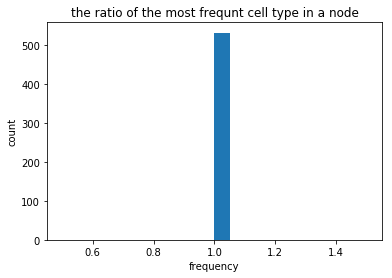

In [15]:
# celltype_repの全体に対する割合の分布
plt.hist(celltype_freq_dist, bins=20)
plt.title("the ratio of the most frequnt cell type in a node")
plt.xlabel("frequency")
plt.ylabel("count")

In [16]:
#lineageの色つけ
# colorは、そのnodeに含まれているlineageが一番多いもので色つけ
import matplotlib.cm as cm
lineages = list(set(cells["lineage"]))

lineage_colors = cm.rainbow(np.linspace(0, 1, len(lineages)))

lineage_freq_dist = []

colors_lineage_rep = {}
for idx, cluster in enumerate(all_clusters_new):
    
    data = cells.ix[cluster, "lineage"].dropna()
    if len(data) == 0:
        print("hoge")
        print(data)
        continue
    elif len(data.mode()) == 0: # (len(data) == 2 or len(data) == 1) and 
        print("==========")
        print(data)
        rep = list(data)[0]
    else:
        print(data)
        print(data.mode())
        rep = data.mode()[0]
    
    rep_idx = lineages.index(rep)
    freq = data.value_counts()[rep] / len(data)
    rgbd = lineage_colors[rep_idx]
    lineage_freq_dist.append(freq)
    rgbd[3] = freq
    colors_lineage_rep[idx] = lineage_colors[rep_idx]

hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dty

Series([], Name: lineage, dtype: object)
hoge
Series([], Name: lineage, dtype: object)
1442     Cpapax
6917      Cxapp
8951      Cxapp
10426    Cpapax
11697     Cxapp
12059    Cpapax
26541    Cpapax
Name: lineage, dtype: object
0    Cpapax
dtype: object
2601          Cxapp
2635          Cpapa
3074          Cxapp
4427          Cxapp
5236     ABpxaappap
6204         Cpapax
7802         Cxappd
8286         Cxappd
9375          Cpapa
10223        Cpapax
12240         Cpapa
12872         Cxapp
13537    ABpxaappap
14397        Cxappd
14870         Cxapp
27552         Cpapa
38211    ABpxaappaa
39672        Cxappd
70724        Cpapax
Name: lineage, dtype: object
0    Cxapp
dtype: object
12059    Cpapax
Name: lineage, dtype: object
1442     Cpapax
2601      Cxapp
3074      Cxapp
6204     Cpapax
6917      Cxapp
8951      Cxapp
10223    Cpapax
10426    Cpapax
11697     Cxapp
12240     Cpapa
12872     Cxapp
14870     Cxapp
26541    Cpapax
50221    Cpapax
Name: lineage, dtype: object
0    Cxapp
dty

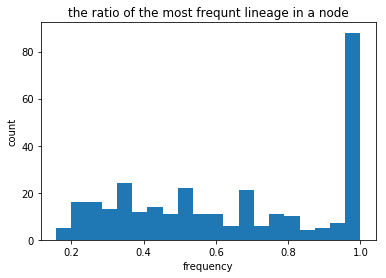

In [17]:
plt.hist(lineage_freq_dist, bins=20)
plt.title("the ratio of the most frequnt lineage in a node")
plt.xlabel("frequency")
plt.ylabel("count")

In [210]:
'#%02x%02x%02x' % (0, 128, 64)

'#008040'

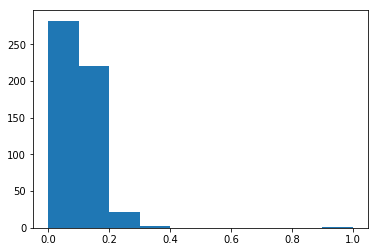

In [217]:
# 細胞周期マーカー発現度合いで色つけ
import math
times = {}
s_vals = []
colors_s = {}

for idx, cluster in enumerate(all_clusters_new):
    try:
        s_val = cell_s_umi.loc[cluster, :].sum()[0] / len(cluster)
    except:
        s_val = 0
    s_vals.append(s_val)

mx = max(s_vals)
s_vals = np.array(s_vals) / mx

plt.hist(s_vals)
colors_s = s_color_mapping(s_vals)



In [209]:
colors_s

['royalblue',
 'navy',
 'royalblue',
 'red',
 'skyblue',
 'seagreen',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'y',
 'royalblue',
 'skyblue',
 'seagreen',
 'navy',
 'royalblue',
 'royalblue',
 'navy',
 'skyblue',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'seagreen',
 'royalblue',
 'navy',
 'navy',
 'limegreen',
 'royalblue',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'royalblue',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'seagreen',
 'skyblue',
 'y',
 'skyblue',
 'skyblue',
 'navy',
 'navy',
 'skyblue',
 'royalblue',
 'navy',
 'navy',
 'royalblue',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'navy',
 'limegreen',
 'limegreen',
 'navy',
 'navy',
 'navy',
 'royalblue',
 'navy',
 'royalblue',
 'seagreen',
 'seagreen',
 'navy',
 'navy',
 'royalblue',
 'royalblue',
 'navy',
 'navy',
 'royalblue',
 'royalblue',
 'seagreen',

In [207]:
import matplotlib.cm as cm

def s_color_mapping(times):
    cls = []
    for time in times:
        if time < 0.1:
            cls.append("navy")
        elif time < 0.2:
            cls.append("royalblue")
        elif time < 0.3:
            cls.append("skyblue")
        elif time < 0.4:
            cls.append("seagreen")
        elif time < 0.5:
            cls.append("limegreen")
        elif time < 0.6:
            cls.append("y")
        elif time < 0.7:
            cls.append("gold")
        elif time < 0.8:
            cls.append("orange")
        else:
            cls.append("red")
    return cls
    
    

In [195]:
cell_s_umi.loc[all_clusters_new[0], :].sum()[0]

38.0

In [18]:
# resolution = 15, gain=0.4
import networkx
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=0.1')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl

fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes_norm, alpha=0.8, node_color=list(colors_embryotime.values()))    
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

#ax.set_facecolor("black")
ax.axis("off")
#fig.set_facecolor("black")
plt.show()
#plt.savefig("pca_100_umap_raw_embryo_time_5.png")

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

In [ ]:
# resolution = 15, gain=0.4
import networkx
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=0.1')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl

fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes_norm, alpha=0.8, node_color=list(colors_celltype_rep.values()))    
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

#ax.set_facecolor("black")
ax.axis("off")
#fig.set_facecolor("black")
plt.show()
#plt.savefig("pca_100_umap_raw_embryo_time_5.png")

/opt/conda/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


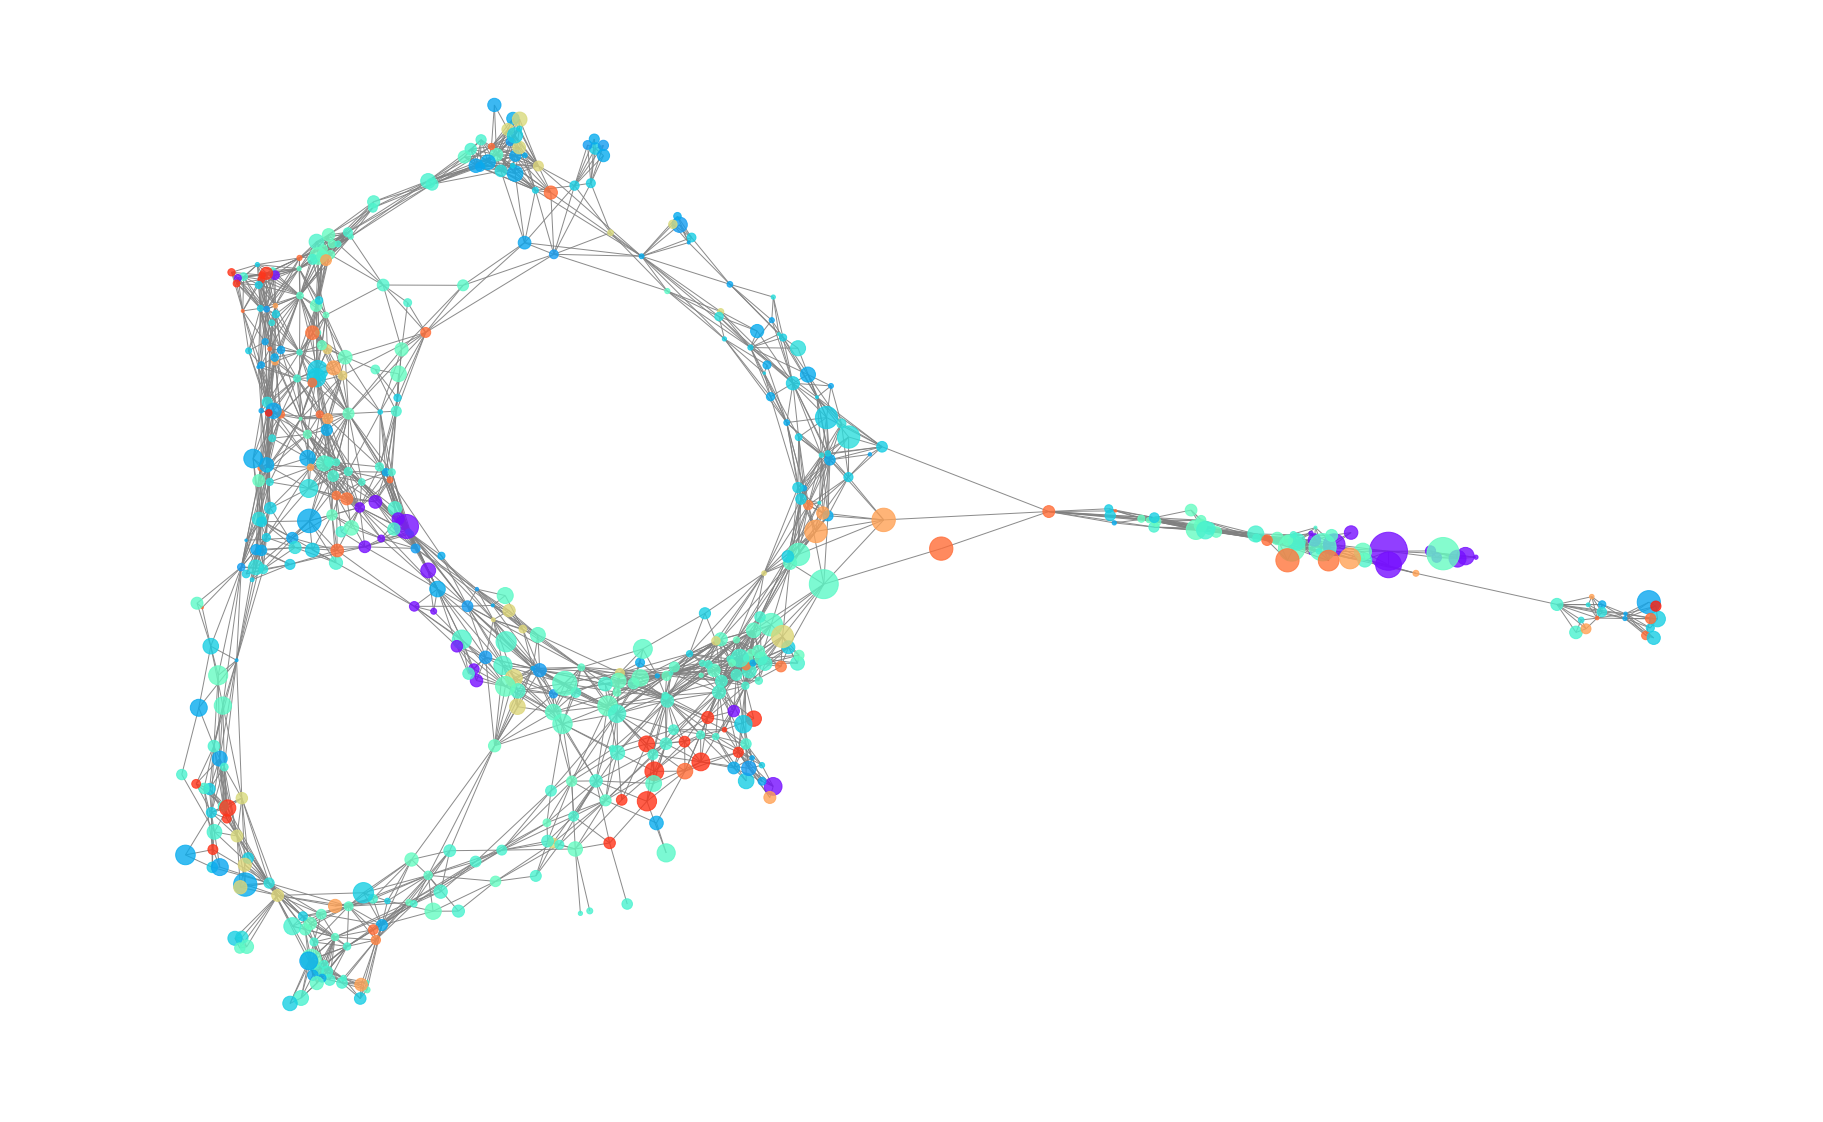

In [214]:
# resolution = 15, gain=0.4
import networkx
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=0.1')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl

fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes_norm, alpha=0.8, node_color=list(colors_lineage_rep.values()))    
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

#ax.set_facecolor("black")
ax.axis("off")
#fig.set_facecolor("black")
plt.show()
#plt.savefig("pca_100_umap_raw_embryo_time_5.png")

/opt/conda/lib/python3.6/site-packages/pygraphviz/agraph.py:1367: RuntimeWarning: Error: remove_overlap: Graphviz not built with triangulation library

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


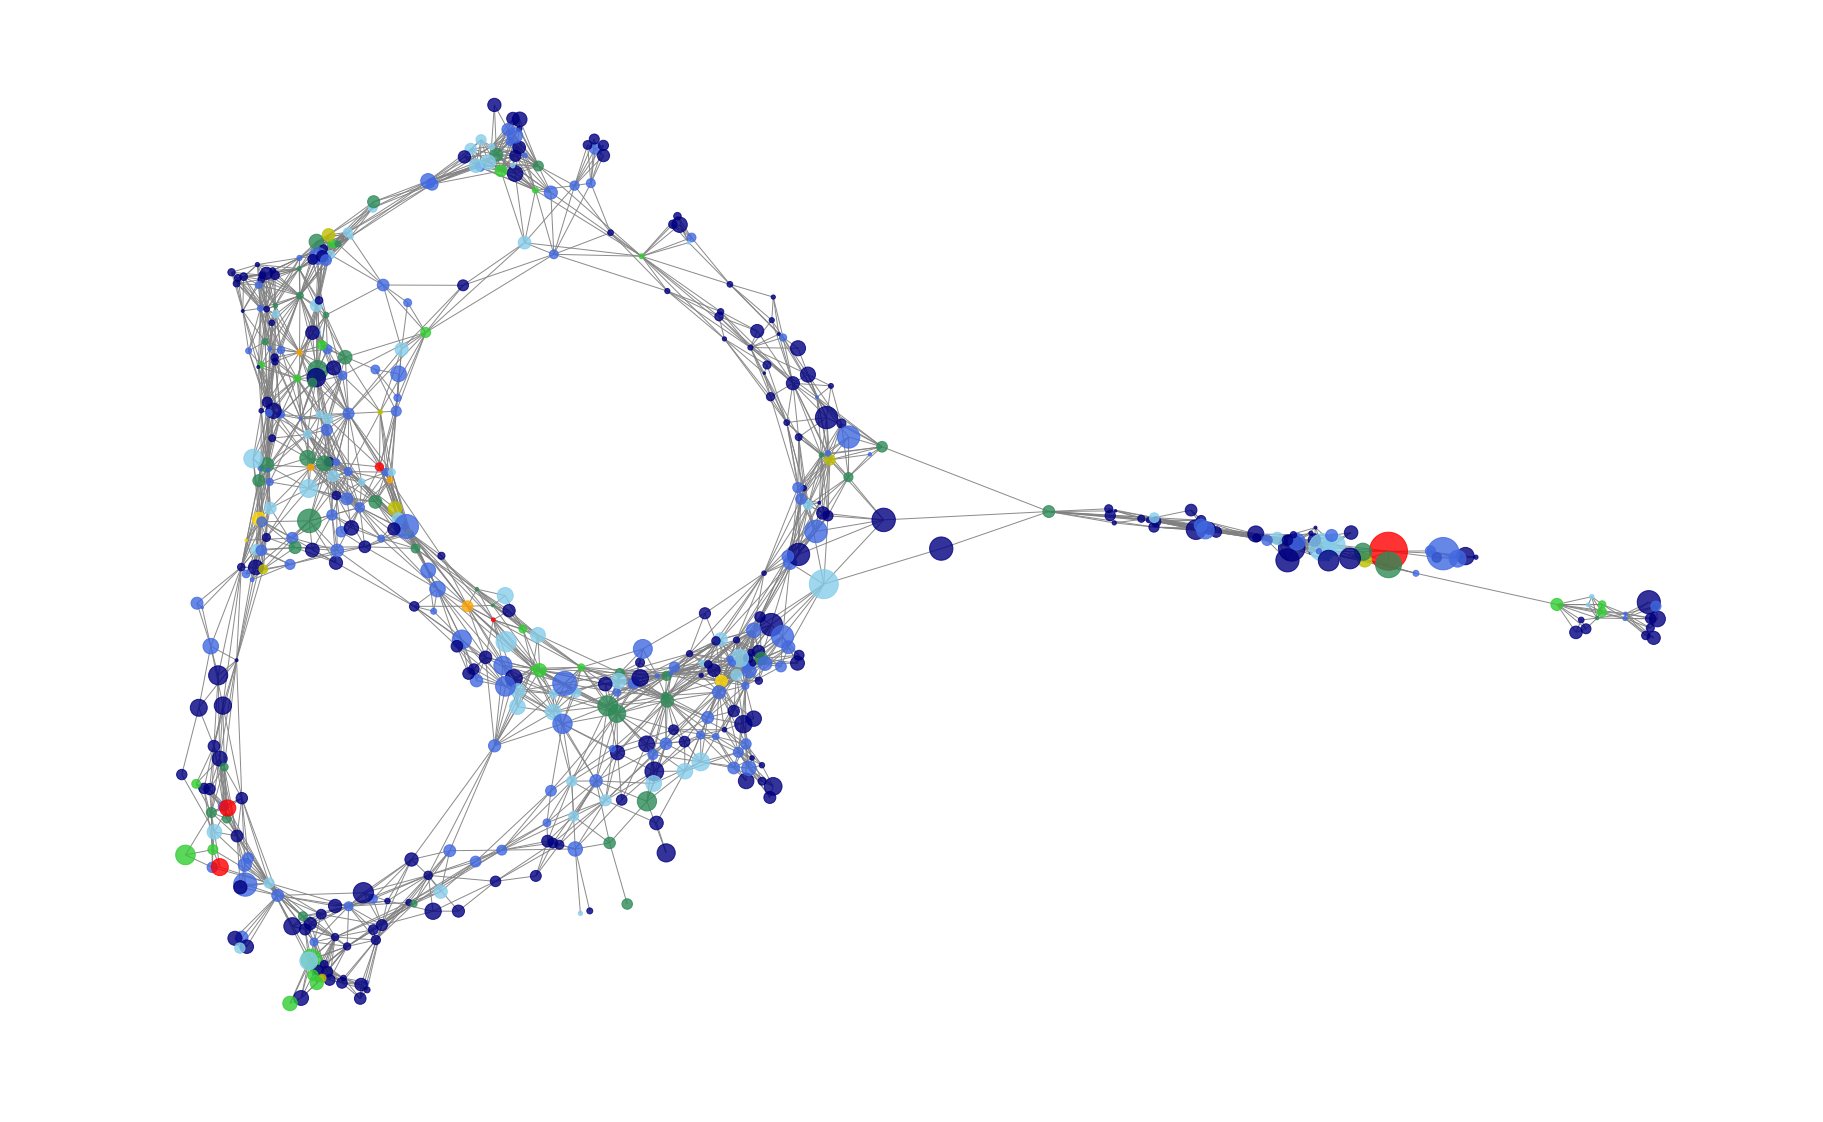

In [215]:
# resolution = 15, gain=0.4
import networkx
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=0.1')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl

fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes_norm, alpha=0.8, node_color=colors_s)    
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

#ax.set_facecolor("black")
ax.axis("off")
#fig.set_facecolor("black")
plt.show()
#plt.savefig("pca_100_umap_raw_embryo_time_5.png")

In [ ]:
# pygraphviz's install
# apt-get update
# apt-get install graphviz libgraphviz-dev pkg-config
# pip3 install pygraphviz

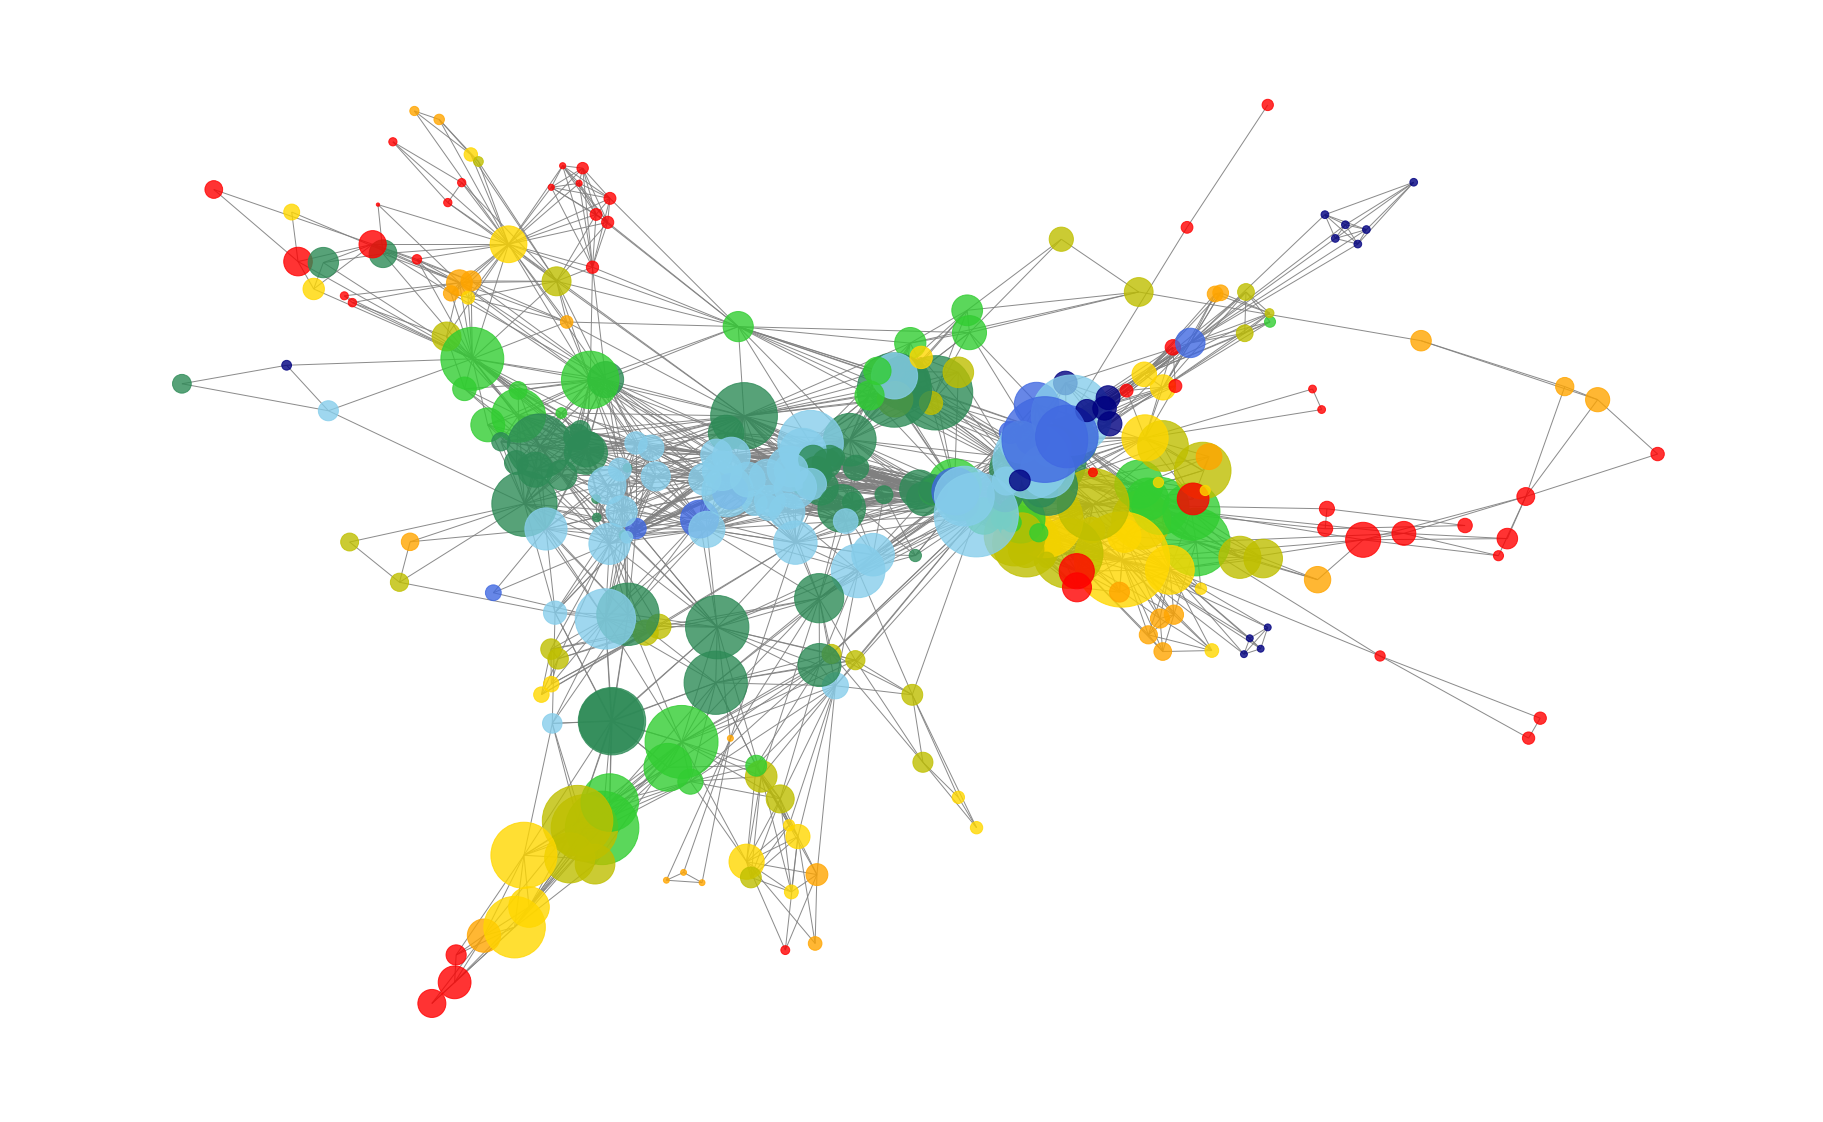

In [61]:
# resolution = 10, gain=0.5
import networkx
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=0.1')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl

fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes_norm, alpha=0.8, node_color=list(colors.values()))    
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

#ax.set_facecolor("black")
ax.axis("off")
#fig.set_facecolor("black")
plt.show()
plt.savefig("pca_100_umap_raw_embryo_time_graphviz.png")

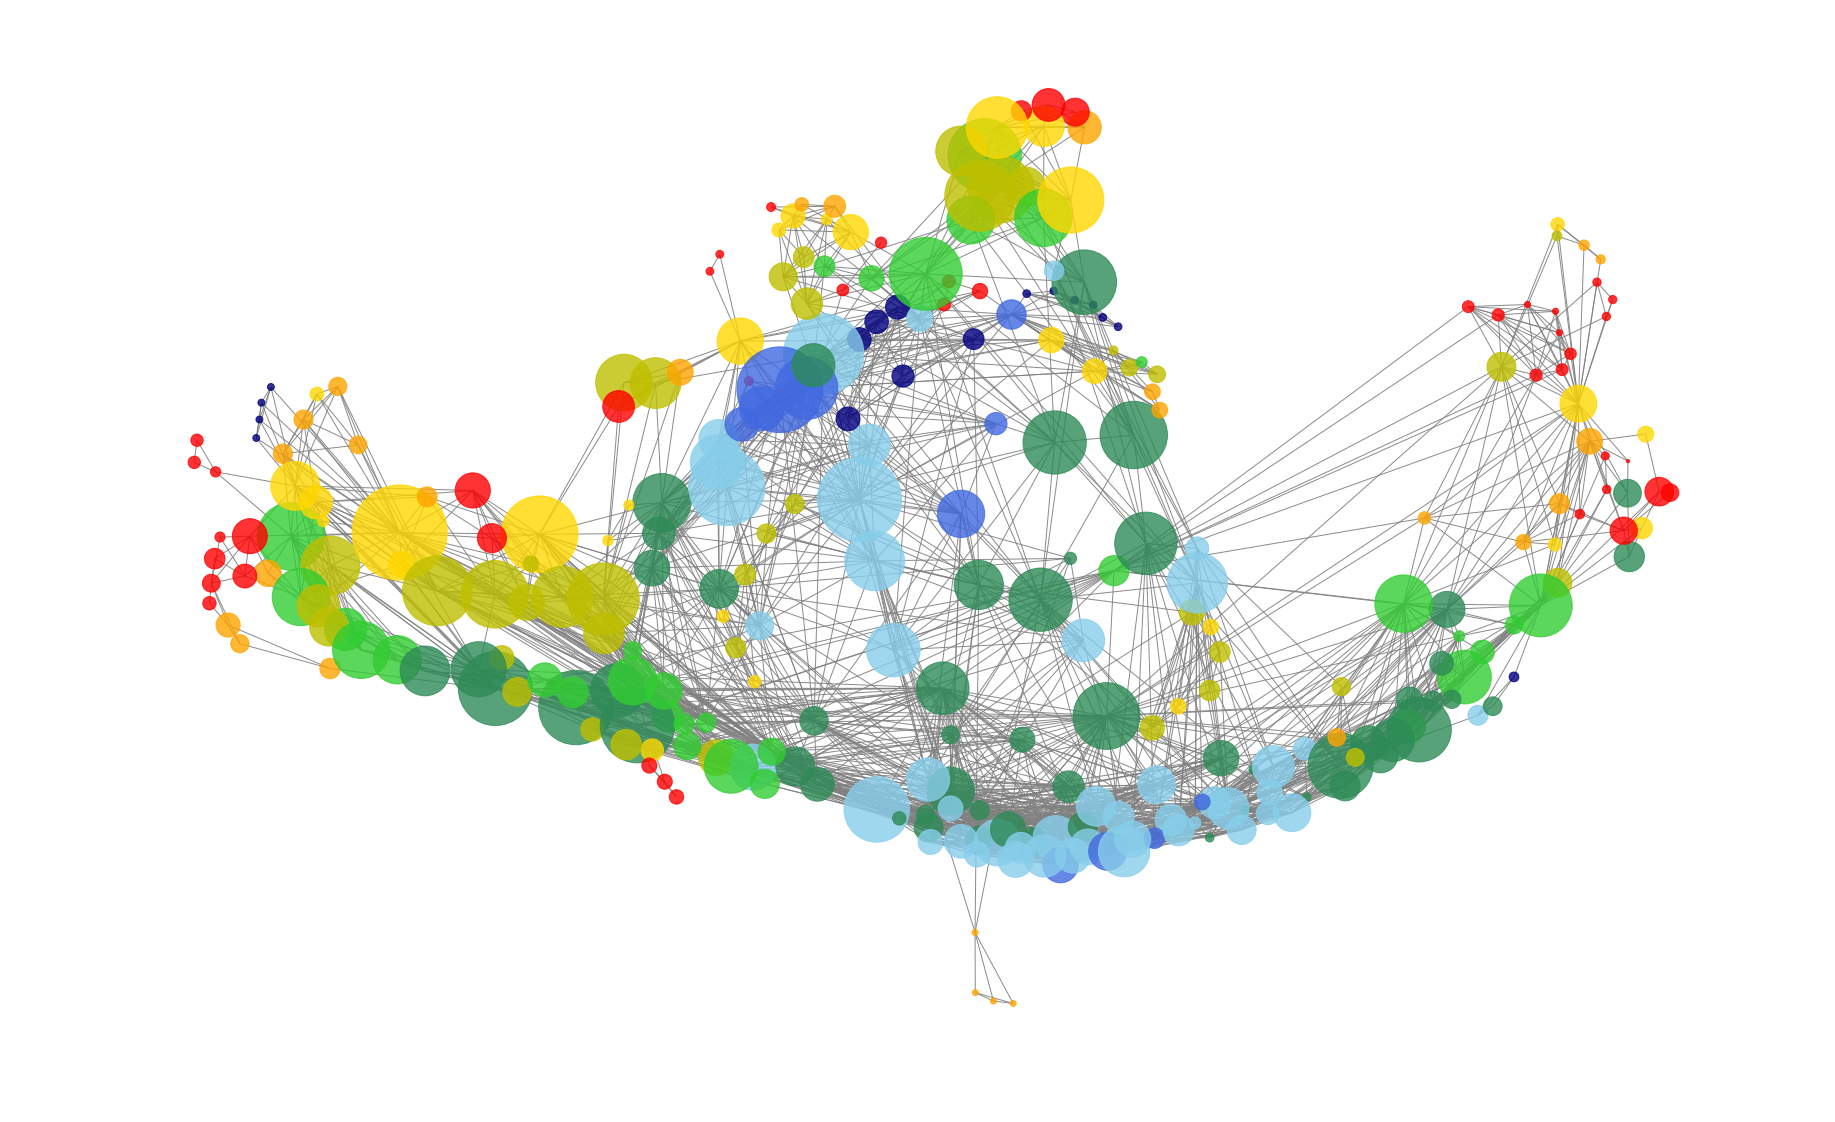

In [63]:
# resolution = 10, gain=0.5
import networkx
from networkx.drawing.nx_agraph import graphviz_layout
listii = [len(aa.nodes()) for aa in list(networkx.connected_component_subgraphs(H))]
indexii = listii.index(numpy.max(listii))
gl = list(networkx.connected_component_subgraphs(H))[indexii]

posgl  = graphviz_layout(gl, 'sfdp', '-Goverlap=false -GK=10')
#pg = graphviz_layout(H, 'sfdp', '-Goverlap=false -GK=0.1')

pg = gl
pos = posgl



fig, ax = plt.subplots(figsize=(32,20))
#plt.figure(figsize=(32,20), facecolor="black")
#pos = nx.spring_layout(H)
nx.draw_networkx_nodes(pg, pos, node_size=sizes_norm, alpha=0.8, node_color=list(colors.values()))    
nx.draw_networkx_edges(pg, pos, width=1, alpha=0.9, edge_color='gray')

#ax.set_facecolor("black")
ax.axis("off")
#fig.set_facecolor("black")
plt.show()
plt.savefig("pca_100_umap_raw_embryo_time_graphviz.png")

In [ ]:
# patchの取り方。1パッチに同じ数が含まれるように。ノードの大きさを同じにしたい
# 画像の保存をきちんとしたい

In [102]:
def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

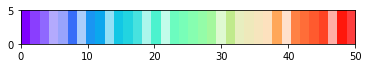

In [118]:
#fig, ax = plt.subplots(1, figsize=(6, 2),
#                           subplot_kw=dict(xticks=[], yticks=[]))
plt.imshow([celltype_colors], extent=[0, 50, 0, 5])
    #ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

In [120]:
celltypes

['Hypodermis',
 'Excretory_cell_parent',
 'hmc',
 'Pharyngeal_marginal_cell',
 'Parent_of_hyp1V_and_ant_arc_V',
 'Body_wall_muscle',
 'Pharyngeal_intestinal_valve',
 'Ciliated_non_amphid_neuron',
 'Excretory_duct_and_pore',
 'hmc_homolog',
 'hyp1V_and_ant_arc_V',
 'M_cell',
 'Seam_cell',
 'Rectal_cell',
 'G2_and_W_blasts',
 'Glia',
 'Excretory_gland',
 'Intestine',
 'Rectal_gland',
 'T',
 'hmc_and_homolog',
 'Parent_of_exc_duct_pore_DB_1_3',
 'XXX',
 'Pharyngeal_neuron',
 'Ciliated_amphid_neuron',
 'GLR',
 'Parent_of_exc_gland_AVK',
 'Pharyngeal_gland',
 'Pharyngeal_muscle',
 'Intestinal_and_rectal_muscle',
 'Germline',
 'Z1_Z4',
 'Excretory_cell',
 'ABarpaaa_lineage',
 'Coelomocyte',
 'Arcade_cell']

In [233]:
celltype_colors

array([[  5.00000000e-01,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  4.45098039e-01,   8.61329395e-02,   9.99070481e-01,
          8.26086957e-01],
       [  3.90196078e-01,   1.71625679e-01,   9.96283653e-01,
          7.16417910e-01],
       [  3.35294118e-01,   2.55842778e-01,   9.91644696e-01,
          4.43661972e-01],
       [  2.72549020e-01,   3.49726511e-01,   9.84086337e-01,
          5.55555556e-01],
       [  2.17647059e-01,   4.29120609e-01,   9.75511968e-01,
          1.00000000e+00],
       [  1.62745098e-01,   5.05325184e-01,   9.65124085e-01,
          3.93728223e-01],
       [  1.00000000e-01,   5.87785252e-01,   9.51056516e-01,
          9.98046875e-01],
       [  4.50980392e-02,   6.55283850e-01,   9.36851839e-01,
          1.00000000e+00],
       [  9.80392157e-03,   7.17911923e-01,   9.20905518e-01,
          4.28093645e-01],
       [  7.25490196e-02,   7.82927610e-01,   9.00586702e-01,
          1.00000000e+00],
       [  1.27450980e

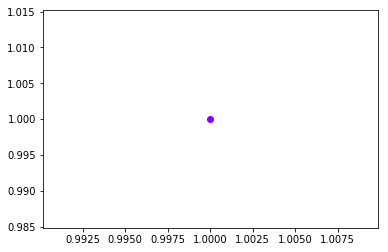

In [235]:
plt.scatter(1,1, c=[0.5,0,1,1])

In [236]:
pd.DataFrame(celltypes).to_csv("celltypes.")

0
0                       Hypodermis
1            Excretory_cell_parent
2                              hmc
3         Pharyngeal_marginal_cell
4    Parent_of_hyp1V_and_ant_arc_V
5                 Body_wall_muscle
6      Pharyngeal_intestinal_valve
7       Ciliated_non_amphid_neuron
8          Excretory_duct_and_pore
9                      hmc_homolog
10             hyp1V_and_ant_arc_V
11                          M_cell
12                       Seam_cell
13                     Rectal_cell
14                 G2_and_W_blasts
15                            Glia
16                 Excretory_gland
17                       Intestine
18                    Rectal_gland
19                               T
20                 hmc_and_homolog
21  Parent_of_exc_duct_pore_DB_1_3
22                             XXX
23               Pharyngeal_neuron
24          Ciliated_amphid_neuron
25                             GLR
26         Parent_of_exc_gland_AVK
27                Pharyngeal_gland
28               Pharyngeal_muscle
29    Intestinal_and_rectal_muscle
30                        Germline
31                           Z1_Z4
32                  Excretory_cell
33                ABarpaaa_lineage
34                     Coelomocyte
35                     Arcade_cell

In [262]:
# Hypodermis cellについて調べる。細胞周期を捉えられるか
cell_idx = cells[cells["cell.type"]==celltypes[0]].index
pca_100.ix[cell_idx, :].to_csv("{}_umap".format(celltypes[0]))

In [261]:
#from numba import core
import umap

AttributeError: module 'numba' has no attribute 'core'

In [2]:
df_umap_0 = pd.read_csv("0_umapped.csv", index_col=0)#.drop("Unnamed: 0", axis=1)
df_umap_0

0          1
6       3.249997   1.684723
40      3.325592   1.728685
41      4.368475   5.442675
48      1.163469   2.160743
54      0.796253  -1.943374
59      3.252410   2.183839
67     -5.591677   2.501791
71      3.609257   0.478361
74      7.505460   3.289396
75      4.489092   1.682699
94      6.509447   4.848917
99      0.465437  -1.049421
100     1.711747   1.686144
107     3.544501   0.600660
112     3.866404   0.592261
116    -2.887426   3.866878
125    -0.823282   3.385916
130     7.911567   2.260926
146    -1.017954  -0.756191
159     2.948751   1.111092
164     5.121862  -0.340063
168     7.296573   2.853159
169     5.592420  -0.461853
170     6.662643   4.822679
176     5.618823   4.488250
182     1.241392  -2.065251
185     2.310986   0.688617
209     4.170771  -0.717765
214     3.842857   4.596036
224     4.419007  -1.017558
...          ...        ...
80683   2.397962  -0.083455
80695  -9.013683  -4.811919
80719   3.584646   5.820475
80737   4.048241 -12.423820
80769   2.603091  -0.268425
80826  -2.786812   2.846729
80834  -9.762512  -8.065671
80876   3.360418  -1.947213
80919   3.516964  -1.844721
80921   3.558790  -1.662971
80937   4.649675   3.361324
80976  -3.014559   3.702569
81008  -2.609668   3.010811
81030 -10.173812  -6.890350
81070   8.209304   1.551686
81083   3.444782  -1.820702
81094  -2.370250   5.419654
81095   4.353978 -10.763115
81097  -9.637175  -6.765312
81117   6.147857  -9.366570
81136   4.369570 -10.055116
81137 -10.586373  -7.324738
81167 -10.087716  -6.889530
81180   6.908013   3.164977
81181  -3.000044   2.246833
81190  -9.935109  -6.265267
81198   4.453967 -11.965728
81209   3.455402  -2.102982
81242  -9.879397  -6.800994
81244   2.345630  -0.006146

[7746 rows x 2 columns]

In [3]:
pca_100_0 = pd.read_csv("Hypodermis_umap", index_col=0)
pca_100_0

PC1        PC2        PC3        PC4        PC5       PC6  \
6      11.394535 -23.926631  -8.360531 -13.608597 -20.503656  1.924362   
40     12.937887 -23.849081  -9.461552 -13.215890 -20.628272  0.956541   
41     17.158172 -26.060050  -8.889267 -15.772022 -20.667517  3.697472   
48     17.446496 -21.935663 -17.466591 -15.605995 -17.511517 -0.002124   
54      5.582431 -13.004541  -6.760814  -9.355293  -8.906833 -1.740987   
59     15.366704 -28.372322  -9.066729 -14.456251 -23.391158  3.186438   
67     31.350851 -20.008953 -28.827456 -13.355883   4.678334  7.238476   
71     12.263677 -21.229897  -7.574335 -13.432603 -19.159063 -0.016525   
74      5.697342 -19.803234  -4.879934 -10.769384 -14.447436  2.629028   
75     11.066682 -26.422221  -7.005733 -13.890978 -22.874713  3.379080   
94     12.203028 -23.651689  -4.501447 -13.295558 -19.451070  3.564844   
99      8.853370 -15.132568 -11.184538 -10.932639 -10.589417 -2.263846   
100    13.495203 -21.638855 -15.236192 -14.118877 -19.121890  0.591500   
107    11.306333 -18.632361  -7.401918 -12.327932 -16.730353  0.258330   
112    11.593379 -20.699874  -5.534204 -12.403918 -18.640913 -0.037419   
116    26.676350 -21.893713 -22.218016 -14.896995  -6.454257  3.935455   
125    25.905186 -27.175216 -19.451454 -17.550200 -15.801825  4.753850   
130    -1.597494 -15.741724   0.402611  -7.632104 -11.105071  0.825118   
146    14.105370 -15.386660 -14.776195 -13.091708  -9.953097 -1.330572   
159     9.640347 -19.187868 -11.347281 -11.549313 -17.108509  0.827613   
164     3.484048 -15.799007  -4.641793  -9.852256 -15.164325 -0.799019   
168     4.016910 -18.029646  -1.374490 -10.129536 -13.586089  2.982633   
169     1.907896 -20.384866  -3.745945 -10.670350 -17.081760  0.161526   
170    10.906850 -22.436429  -6.978340 -12.420492 -18.521173  3.795415   
176    14.948326 -21.980080  -6.937599 -14.506762 -18.517026  3.113066   
182     3.220531  -9.773499  -6.248888  -7.649739  -4.566670 -1.863061   
185    11.006555 -16.983521  -9.882126 -11.478543 -15.205455 -1.030151   
209     6.178250 -16.804619  -8.370449 -11.298924 -14.413615 -0.760847   
214    14.221512 -20.010287  -8.723904 -14.892515 -15.976109  2.627992   
224     4.633778 -14.517825  -5.310051  -8.789577 -10.976923 -0.064089   
...          ...        ...        ...        ...        ...       ...   
80683  12.654619 -17.771275  -9.270633 -11.816402 -13.351469  1.652586   
80695  16.254037  -0.785259 -17.613828  -1.966958  28.994041  1.503214   
80719  18.625317 -25.717285 -11.680407 -14.762980 -19.241901  5.370307   
80737   7.857078   1.847903 -10.270358  -0.011660  11.388000 -2.779392   
80769   9.916712 -14.864980  -8.720676 -11.318698 -12.628241 -0.221423   
80826  13.621823 -10.124919 -10.419756  -7.224913   1.604600  3.565909   
80834  17.269797   2.479938 -14.795788   1.303359  21.959306  0.420869   
80876   1.517932  -9.278734  -4.033281  -5.522989  -7.391888 -0.652582   
80919  -0.546911 -12.266589  -1.203845  -7.076996  -9.333770  0.742212   
80921   1.924976 -15.546453  -3.643274  -8.446906 -12.013242  0.897717   
80937   9.806835 -17.059628  -8.198518 -11.551835 -10.991916  2.585583   
80976  26.389414 -23.661242 -22.091293 -13.661829  -5.433520  5.457957   
81008  19.601903 -17.997545 -21.582464 -13.169231  -4.405403  3.042946   
81030  14.761144   1.661406 -10.638306  -1.570812  21.821049  2.762322   
81070  -3.074850 -12.490568   1.189881  -5.017384  -6.369177  0.615629   
81083   7.067710  -8.222132  -6.359335  -5.805150  -6.132514  1.866837   
81094  19.962628 -16.844095 -17.349589 -11.134925  -3.572341  3.975593   
81095  -0.943007   3.966912  -5.356288   3.312159   3.425219  1.018346   
81097   8.656890  -0.873504  -8.468770  -0.903969  16.076808  2.457924   
81117   6.716325  -2.144020  -8.231558   0.005868   6.145547  1.780075   
81136   4.702125  -1.857208  -8.476756  -1.871994  -0.797786 -1.249450   
81137  17.294980   0.995510 -14.008443  -0.491236  25.469748  1.458478   
81167   8.184793 

In [25]:
# 特定celltypeのcell cycleを見るにあったって
# G1期マーカー遺伝子達の発現で色を塗る
genes = pd.read_csv("data/elegance/GSE126954_gene_annotation.csv")
genes

Unnamed: 0              id gene_short_name
0      WBGene00010957  WBGene00010957          nduo-6
1      WBGene00010958  WBGene00010958          ndfl-4
2      WBGene00010959  WBGene00010959          nduo-1
3      WBGene00010960  WBGene00010960           atp-6
4      WBGene00010961  WBGene00010961          nduo-2
5      WBGene00000829  WBGene00000829           ctb-1
6      WBGene00010962  WBGene00010962           ctc-3
7      WBGene00010963  WBGene00010963          nduo-4
8      WBGene00010964  WBGene00010964           ctc-1
9      WBGene00010965  WBGene00010965           ctc-2
10     WBGene00010966  WBGene00010966          nduo-3
11     WBGene00010967  WBGene00010967          nduo-5
12     WBGene00021406  WBGene00021406         frm-5.2
13     WBGene00021407  WBGene00021407       Y38C1AB.5
14     WBGene00021408  WBGene00021408          trpl-4
15     WBGene00021405  WBGene00021405       Y38C1AB.3
16     WBGene00021409  WBGene00021409       Y38C1AB.7
17     WBGene00021404  WBGene00021404          trpl-3
18     WBGene00001492  WBGene00001492         frm-5.1
19     WBGene00021403  WBGene00021403       Y38C1AB.1
20     WBGene00235257  WBGene00235257         T05C7.4
21     WBGene00235258  WBGene00235258         T05C7.5
22     WBGene00235260  WBGene00235260         T05C7.7
23     WBGene00235261  WBGene00235261         T05C7.8
24     WBGene00235262  WBGene00235262         T05C7.9
25     WBGene00015246  WBGene00015246          scl-23
26     WBGene00006599  WBGene00006599           tpa-1
27     WBGene00015247  WBGene00015247         B0545.4
28     WBGene00017927  WBGene00017927         F29C4.4
29     WBGene00017928  WBGene00017928           tut-1
...               ...             ...             ...
20192  WBGene00013163  WBGene00013163       Y53F4B.17
20193  WBGene00013164  WBGene00013164       Y53F4B.18
20194  WBGene00013165  WBGene00013165       Y53F4B.19
20195  WBGene00013166  WBGene00013166       Y53F4B.20
20196  WBGene00013167  WBGene00013167       Y53F4B.21
20197  WBGene00013176  WBGene00013176       Y53F4B.39
20198  WBGene00013168  WBGene00013168           arp-1
20199  WBGene00013169  WBGene00013169       Y53F4B.23
20200  WBGene00219491  WBGene00219491       Y53F4B.62
20201  WBGene00013170  WBGene00013170       Y53F4B.24
20202  WBGene00013171  WBGene00013171       Y53F4B.25
20203  WBGene00013172  WBGene00013172       Y53F4B.26
20204  WBGene00013173  WBGene00013173       Y53F4B.27
20205  WBGene00004234  WBGene00004234          ptr-20
20206  WBGene00001774  WBGene00001774          gst-26
20207  WBGene00001775  WBGene00001775          gst-27
20208  WBGene00001776  WBGene00001776          gst-28
20209  WBGene00001777  WBGene00001777          gst-29
20210  WBGene00001787  WBGene00001787          gst-39
20211  WBGene00001779  WBGene00001779          gst-31
20212  WBGene00013175  WBGene00013175       Y53F4B.36
20213  WBGene00001780  WBGene00001780          gst-32
20214  WBGene00001782  WBGene00001782          gst-34
20215  WBGene00001783  WBGene00001783          gst-35
20216  WBGene00021598  WBGene00021598      Y46E12BR.1
20217  WBGene00021597  WBGene00021597          spsb-1
20218  WBGene00021596  WBGene00021596          spsb-2
20219  WBGene00021595  WBGene00021595      Y46E12BL.2
20220  WBGene00021594  WBGene00021594           tig-3
20221  WBGene00007064  WBGene00007064         2RSSE.1

[20222 rows x 3 columns]

In [26]:
df_umi = pd.read_csv("data/elegance/GSE126954_gene_by_cell_count_matrix.txt", sep=" ", skiprows=1)
df_umi

20222  89701  82802059
0             1      1         5
1             3      1         0
2             4      1         7
3             5      1         3
4             6      1         5
5             7      1         8
6             8      1         3
7             9      1         5
8            10      1         4
9            11      1         1
10           12      1         4
11           40      1         2
12           41      1         1
13           48      1         1
14           49      1         1
15           57      1         1
16           79      1         3
17           83      1         1
18           85      1         1
19          129      1         3
20          130      1         1
21          191      1         1
22          197      1         1
23          206      1        56
24          294      1         1
25          301      1         1
26          308      1         1
27          330      1         1
28          352      1         1
29          418      1         1
...         ...    ...       ...
82802029  19449  89701         0
82802030  19458  89701         1
82802031  19468  89701         2
82802032  19473  89701         1
82802033  19493  89701         1
82802034  19586  89701         3
82802035  19607  89701         1
82802036  19613  89701         1
82802037  19640  89701         1
82802038  19654  89701         1
82802039  19655  89701         1
82802040  19657  89701         2
82802041  19662  89701         1
82802042  19691  89701         1
82802043  19813  89701         1
82802044  19870  89701         1
82802045  19899  89701         1
82802046  19912  89701         2
82802047  19916  89701         1
82802048  19946  89701         1
82802049  19972  89701         2
82802050  20002  89701         2
82802051  20015  89701         1
82802052  20050  89701         0
82802053  20061  89701         2
82802054  20062  89701         0
82802055  20082  89701         1
82802056  20089  89701         1
82802057  20092  89701         1
82802058  20114  89701         1

[82802059 rows x 3 columns]

In [27]:
data_umi = df_umi["82802059"]
data_cells = df_umi["89701"]
data_genes = df_umi["20222"]


In [ ]:
csr_mtrx = csr_matrix((data_umi, (data_cells, data_genes)))

In [153]:
s_indexs = genes[genes["gene_short_name"].isin(s_genes)].index

In [216]:
len(s_indexs)

12

In [188]:
g2m_indexs  = genes[genes["gene_short_name"].isin(g2m_genes)]
g2m_indexs

Unnamed: 0              id gene_short_name
1619   WBGene00001051  WBGene00001051           cks-1
1993   WBGene00003576  WBGene00003576          ndc-80
4092   WBGene00004874  WBGene00004874           smc-4
5101   WBGene00000388  WBGene00000388        cdc-25.3
5287   WBGene00000405  WBGene00000405           cdk-1
9874   WBGene00000386  WBGene00000386        cdc-25.1
10061  WBGene00000275  WBGene00000275           bub-1
11960  WBGene00000387  WBGene00000387        cdc-25.2
17437  WBGene00022453  WBGene00022453          ncap-1
19264  WBGene00000389  WBGene00000389        cdc-25.4
19396  WBGene00002297  WBGene00002297           ect-2
19635  WBGene00010785  WBGene00010785           top-2

In [79]:
s_genes = ["mcm-5", "mcm-2", "rfc-2", "rad-51", "exo-1",  "chaf-1", "mcm-4", "mcm-6", "rpa-2", "tyms", "rpm-1", "cdca-7", "msh-2", "cdc-6", "pola-1"]

In [ ]:
"gins2", "prim-1", "gmnn", "ubr7", "casp8ap2","chaf1b" / ung, nasp

In [146]:
g2m_genes = ["cks-1", "ncap-1", "cdk-1", "top-2", "smc-4", "bub-1", "ndc-80", "cdc-25.1", "cdc-25.2", "cdc-25.3", "cdc-25.4",  "ect-2"]
                 



In [140]:
genes[genes["gene_short_name"].str.contains("nek")]

Unnamed: 0              id gene_short_name
4338  WBGene00017033  WBGene00017033          nekl-4
7988  WBGene00008956  WBGene00008956          nekl-3
9060  WBGene00021461  WBGene00021461          nekl-1
9927  WBGene00022631  WBGene00022631          nekl-2

In [150]:
cell_indexs = pca_100_0.index
cell_indexs

Int64Index([    6,    40,    41,    48,    54,    59,    67,    71,    74,
               75,
            ...
            81136, 81137, 81167, 81180, 81181, 81190, 81198, 81209, 81242,
            81244],
           dtype='int64', length=7746)

In [175]:
len(cell_indexs)

7746

In [155]:
df_umi_cell = df_umi[df_umi["89701"].isin(cell_indexs)]
df_umi_cell_s = df_umi_cell[df_umi_cell["20222"].isin(s_indexs)]
df_umi_cell_g2m = df_umi_cell[df_umi_cell["20222"].isin(g2m_indexs)]

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [185]:
cell_s_umi = df_umi_cell_s.groupby('89701').sum()
cell_g2m_umi = df_umi_cell_g2m.groupby('89701').sum()



In [189]:
cell_s_umi = cell_s_umi.reset_index()[["89701","82802059"]].set_index('89701')
#cell_g2m_umi#.reset_index()[["89701","82802059"]].set_index('89701')
cell_s_umi

82802059
89701          
6             1
48            4
54            1
59            1
67            2
71            2
75            1
99            1
112           1
125           1
159           2
164           4
170           2
176           1
182           2
209           1
214           1
224           5
226           1
230           3
238           1
240           3
250           1
271           2
283           3
311           1
325           3
327           1
340           2
342           1
...         ...
79822         2
79867         1
79895         2
79910         1
79977         2
80166         3
80333         1
80422         1
80425         2
80448         2
80452         1
80475         3
80483         4
80524         1
80552         1
80567         1
80647         1
80662         5
80668         1
80683         1
80737         1
80769         1
80834         1
80876         1
80919        19
81008         3
81097         1
81136         1
81190         1
81198         1

[3636 rows x 1 columns]

In [187]:
df_umi_cell_g2m

Empty DataFrame
Columns: [20222, 89701, 82802059]
Index: []

In [164]:
df_umi_cell_s[df_umi_cell_s["89701"]==80919]

20222  89701  82802059
75878654   4092  80919         1
75879038   5101  80919         1
75879095   5287  80919        12
75879964  10061  80919         5

In [168]:
cell_s_umi.loc[[4092, 5101], "82802059"]

KeyError: 'None of [[4092, 5101]] are in the [index]'

In [181]:
cell_s_umi.reset_index()[["89701","82802059"]].set_index('89701').loc[[6,7],:]

82802059
89701          
6           1.0
7           NaN